In [5]:
import numpy as np
import matplotlib.pyplot as plt
from cavity_codes.rfp2 import *
from cavity_codes.rfp2 import get_spectrum, read_dfl, plot_fld_power
import pickle
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
fontsize = 14
import pickle
#import SDDS
%config InlineBackend.figure_format = 'retina'


## Figure 2 

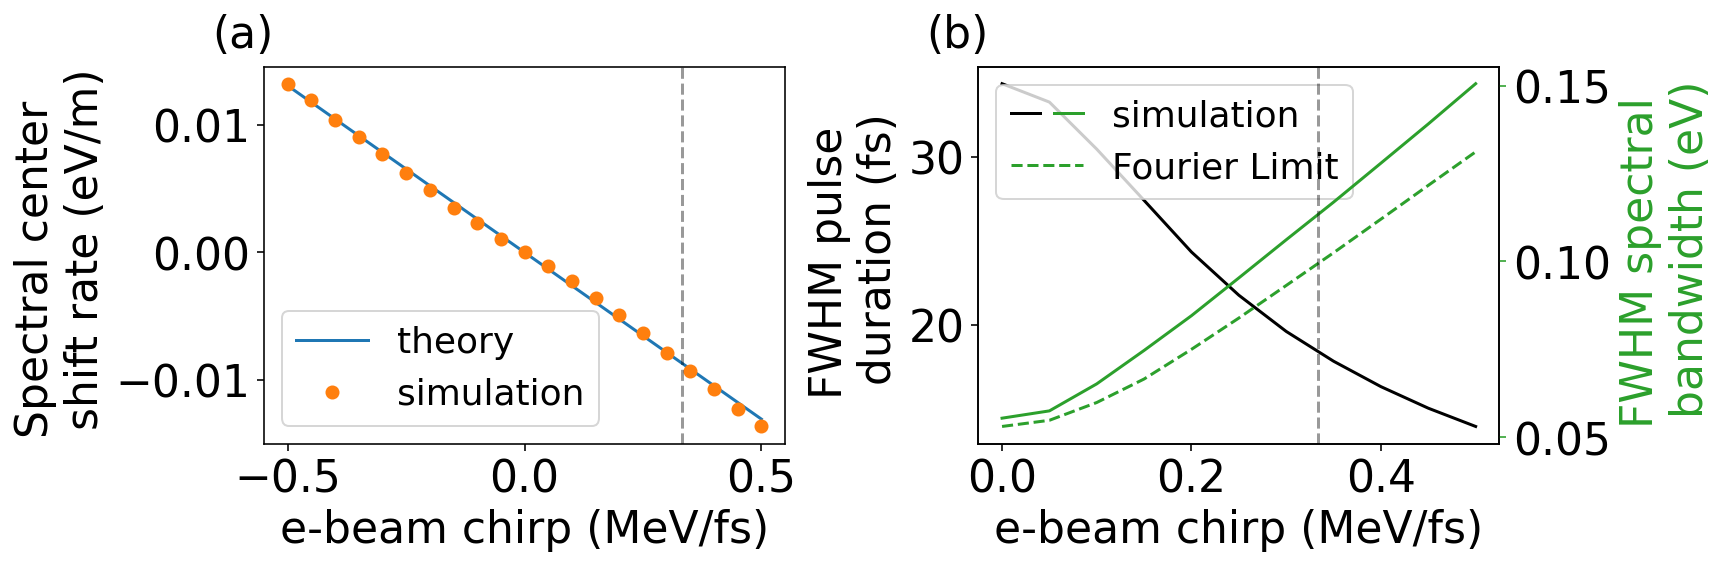

In [11]:
from matplotlib.legend_handler import HandlerTuple
fontsize = 22
plt.figure(figsize = (12, 4))
chirplist, centershift_theory = pickle.load( open( "genesis_interface/centershift_theory.p", "rb" ) )
chirplist, centershift_sim = pickle.load( open( "genesis_interface/centershift_sim.p", "rb" ) )

plt.subplot(1, 2, 1)
plt.plot(chirplist/100, centershift_theory, label  = 'theory')
plt.plot(chirplist/100, centershift_sim, 'o', label = 'simulation')
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.axvline(x = 1/3,linestyle = '--', color = 'k', alpha = 0.4)
ax.text(-0.1, 1.05, '(a)', transform=ax.transAxes, 
            size=fontsize)

plt.xlabel('e-beam chirp (MeV/fs)', fontsize = fontsize)
plt.ylabel('Spectral center  \n shift rate (eV/m)', fontsize = fontsize)
plt.legend(fontsize = fontsize-4)

chirplist, flim_spec = pickle.load( open( "genesis_interface/flim_spec.p", "rb" ) )
chirplist, flim_time = pickle.load(open( "genesis_interface/flim_time.p", "rb" ))
chirplist, fwhm_spec = pickle.load(open( "genesis_interface/fwhm_spec.p", "rb" ))
chirplist, fwhm_time = pickle.load(open( "genesis_interface/fwhm_time.p", "rb" ))


plt.subplot(1,2 ,2)
ax1 = plt.gca()
p1, =ax1.plot(chirplist/100, fwhm_time, color = 'k')
ax1.set_ylabel('FWHM pulse \n duration (fs)', color = 'k', fontsize  = fontsize)
ax1.set_xlabel('e-beam chirp (MeV/fs)', fontsize = fontsize)

ax1.tick_params(axis='y', labelsize=fontsize, color = 'k')
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.text(-0.1, 1.05, '(b)', transform=ax1.transAxes, 
            size=fontsize)
ax2 = ax1.twinx()
p2, = ax2.plot(chirplist/100, fwhm_spec,  color = 'C2')
p3, = ax2.plot(chirplist/100, flim_spec,  linestyle = 'dashed', color = 'C2')
ax2.axvline(x = 1/3,linestyle = '--', color = 'k', alpha = 0.4)
ax2.set_ylabel('FWHM spectral \n bandwidth (eV)', color = 'C2', fontsize  = fontsize)
ax2.tick_params(axis='y', labelsize=fontsize, color = 'C2')
#plt.legend(fontsize = fontsize-2)
l = ax1.legend([(p1, p2), p3], ['simulation', 'Fourier Limit'],
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize = fontsize -4, loc = 'upper left')

plt.tight_layout()
plt.savefig('figures/figure2_v2.pdf')


## Figure 3 long cavity

In [6]:
ncar = 181
dgrid = 540e-6
w0 =40e-6
#xlamds = 1.7834064e-10
xlamds = 1.261043e-10
zsep = 140
c_speed  = 299792458
nslice = 1024
isradi = 1
verbosity = True
dt = xlamds*isradi*zsep/c_speed
folder_name = 'data_long_stats'


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

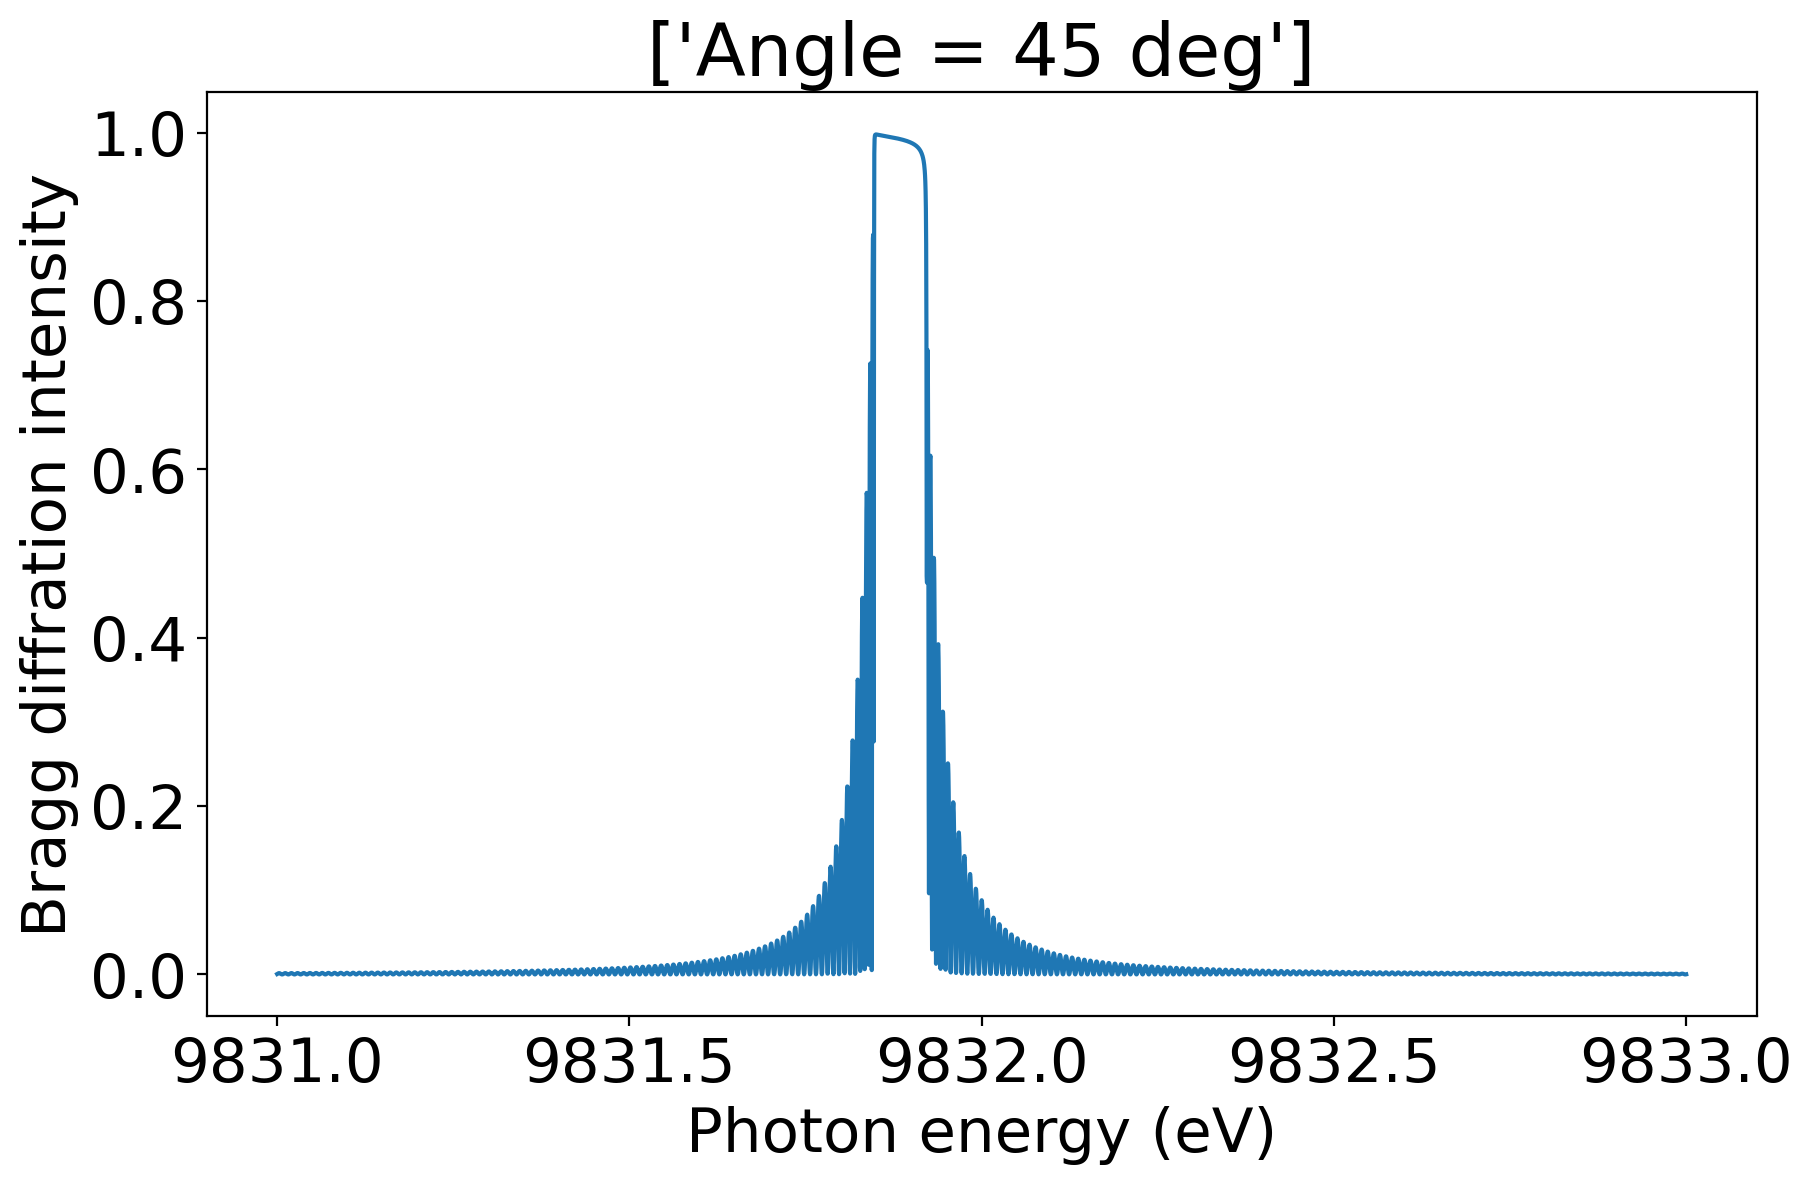

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

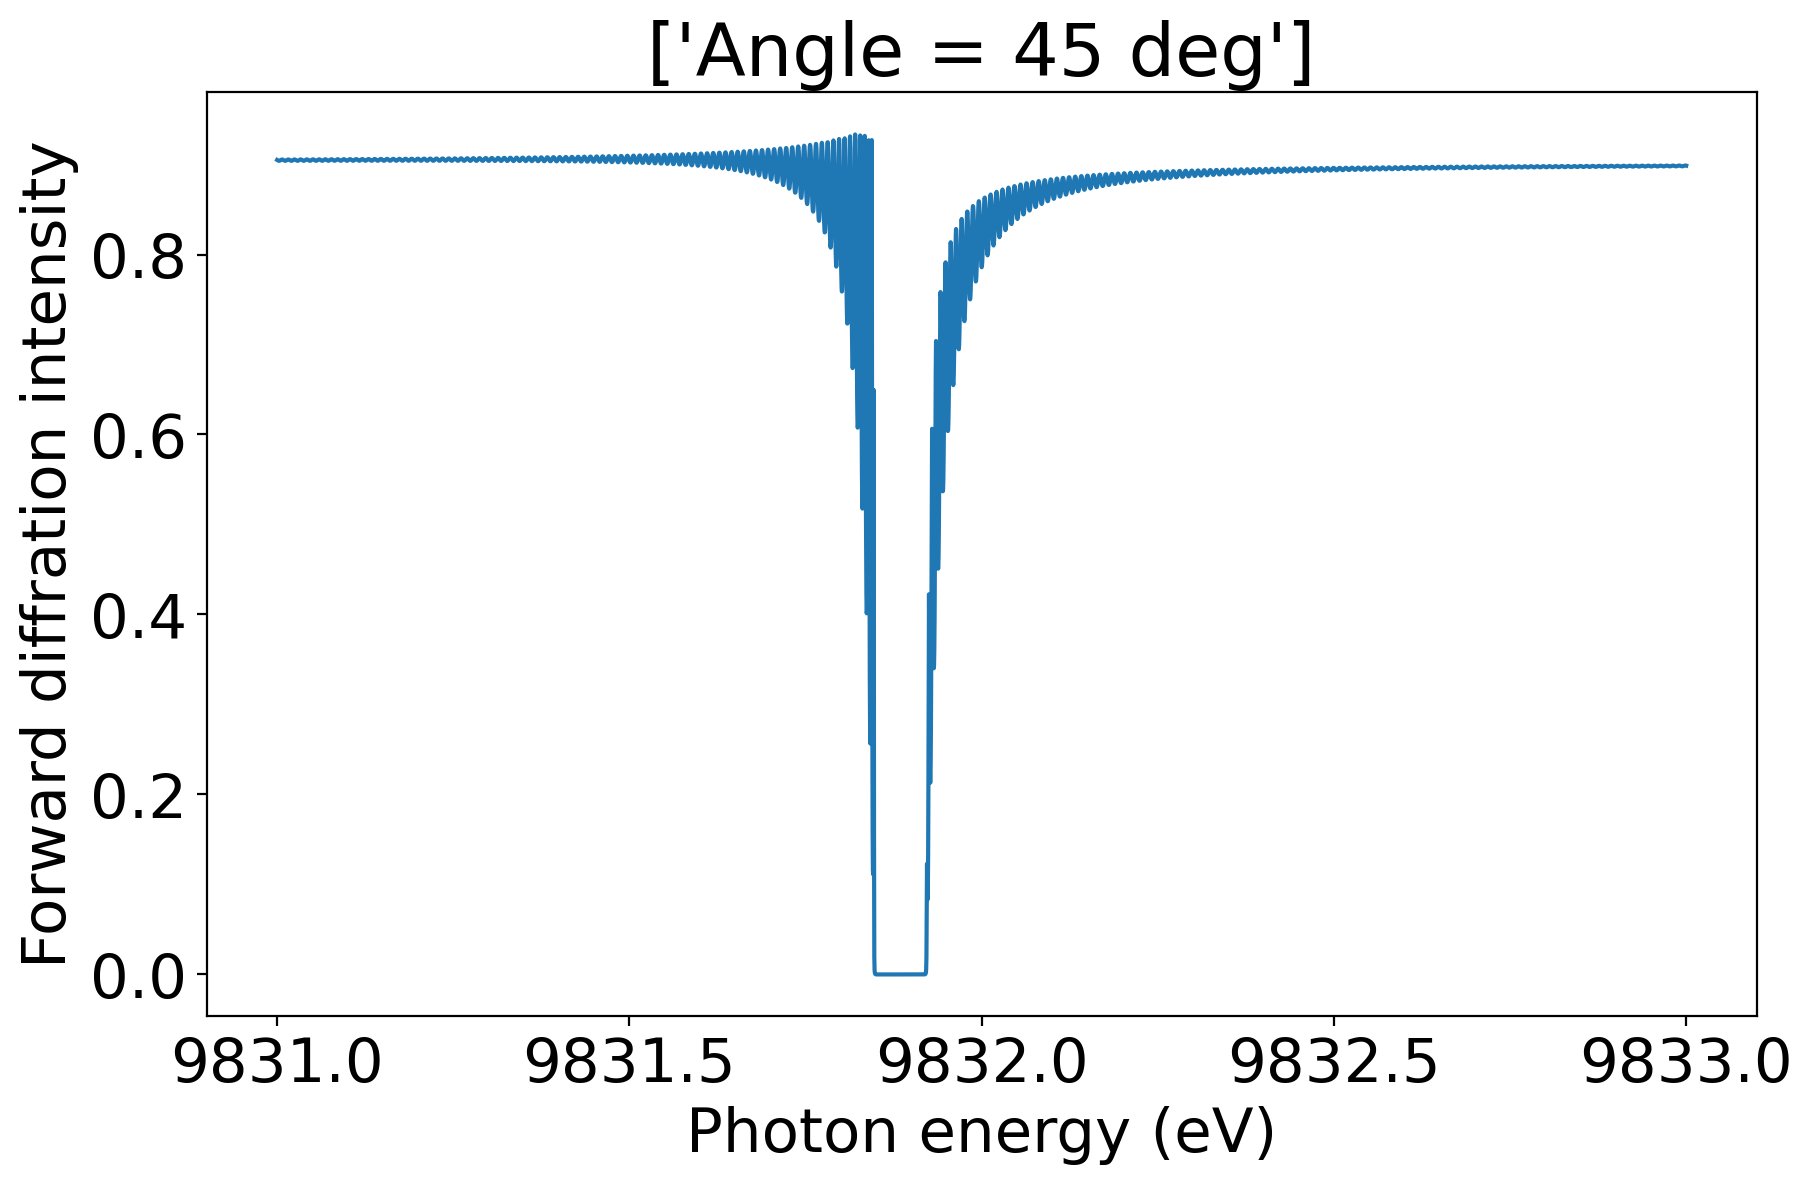

In [7]:
from cavity_codes.Bragg_mirror import *
Eph, R0H, R00 = plot_Bragg_mirror_response_slice(d = 100e-6)

In [8]:
fontsize = 14
power_record = []
spectra_record0 = []
spectra_record1 = []
for k in np.arange(6, 11):

    filename = 'n'+str(int(k)) + '_field_transmit_round0.dfl'
    print(filename)
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    power = np.sum(np.abs(fld)**2,axis = (1,2))
    s_fs = np.arange(len(power))*dt/1e-15
    s_fs -= np.mean(s_fs)
    power_record.append((s_fs, power))
    hws, spectra = get_spectrum(fld, zsep, xlamds, npad = 1000, onaxis=True)
    spectra_record0.append((hws, spectra))

    
    filename = 'tap0.03_K1.172_n' + str(k) + '.out.dfl'
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    hws, spectra = get_spectrum(fld, zsep, xlamds, npad = 4569, onaxis=True)
    spectra_record1.append((hws, spectra))
    

n6_field_transmit_round0.dfl
4.897935152053833 seconds to read in fld array (268509156,)
read 8196 slices
5.0067901611328125e-06 seconds to reshape fld array (8196, 181, 181)
0.46577882766723633 seconds to read in fld array (34661138,)
read 1058 slices
5.0067901611328125e-06 seconds to reshape fld array (1058, 181, 181)
n7_field_transmit_round0.dfl
3.8331263065338135 seconds to read in fld array (268509156,)
read 8196 slices
5.245208740234375e-06 seconds to reshape fld array (8196, 181, 181)
0.44797301292419434 seconds to read in fld array (34661138,)
read 1058 slices
6.4373016357421875e-06 seconds to reshape fld array (1058, 181, 181)
n8_field_transmit_round0.dfl
3.7722930908203125 seconds to read in fld array (268509156,)
read 8196 slices
6.198883056640625e-06 seconds to reshape fld array (8196, 181, 181)
1.050405502319336 seconds to read in fld array (34661138,)
read 1058 slices
6.4373016357421875e-06 seconds to reshape fld array (1058, 181, 181)
n9_field_transmit_round0.dfl
3.83023

In [9]:
result = []
extrac = []
nRound = 11

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    result.extend(power_list)



for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_transmit' + '.txt'
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[1])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    extrac.extend(power_list)

recirc_power = result
out_power = extrac

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
fin

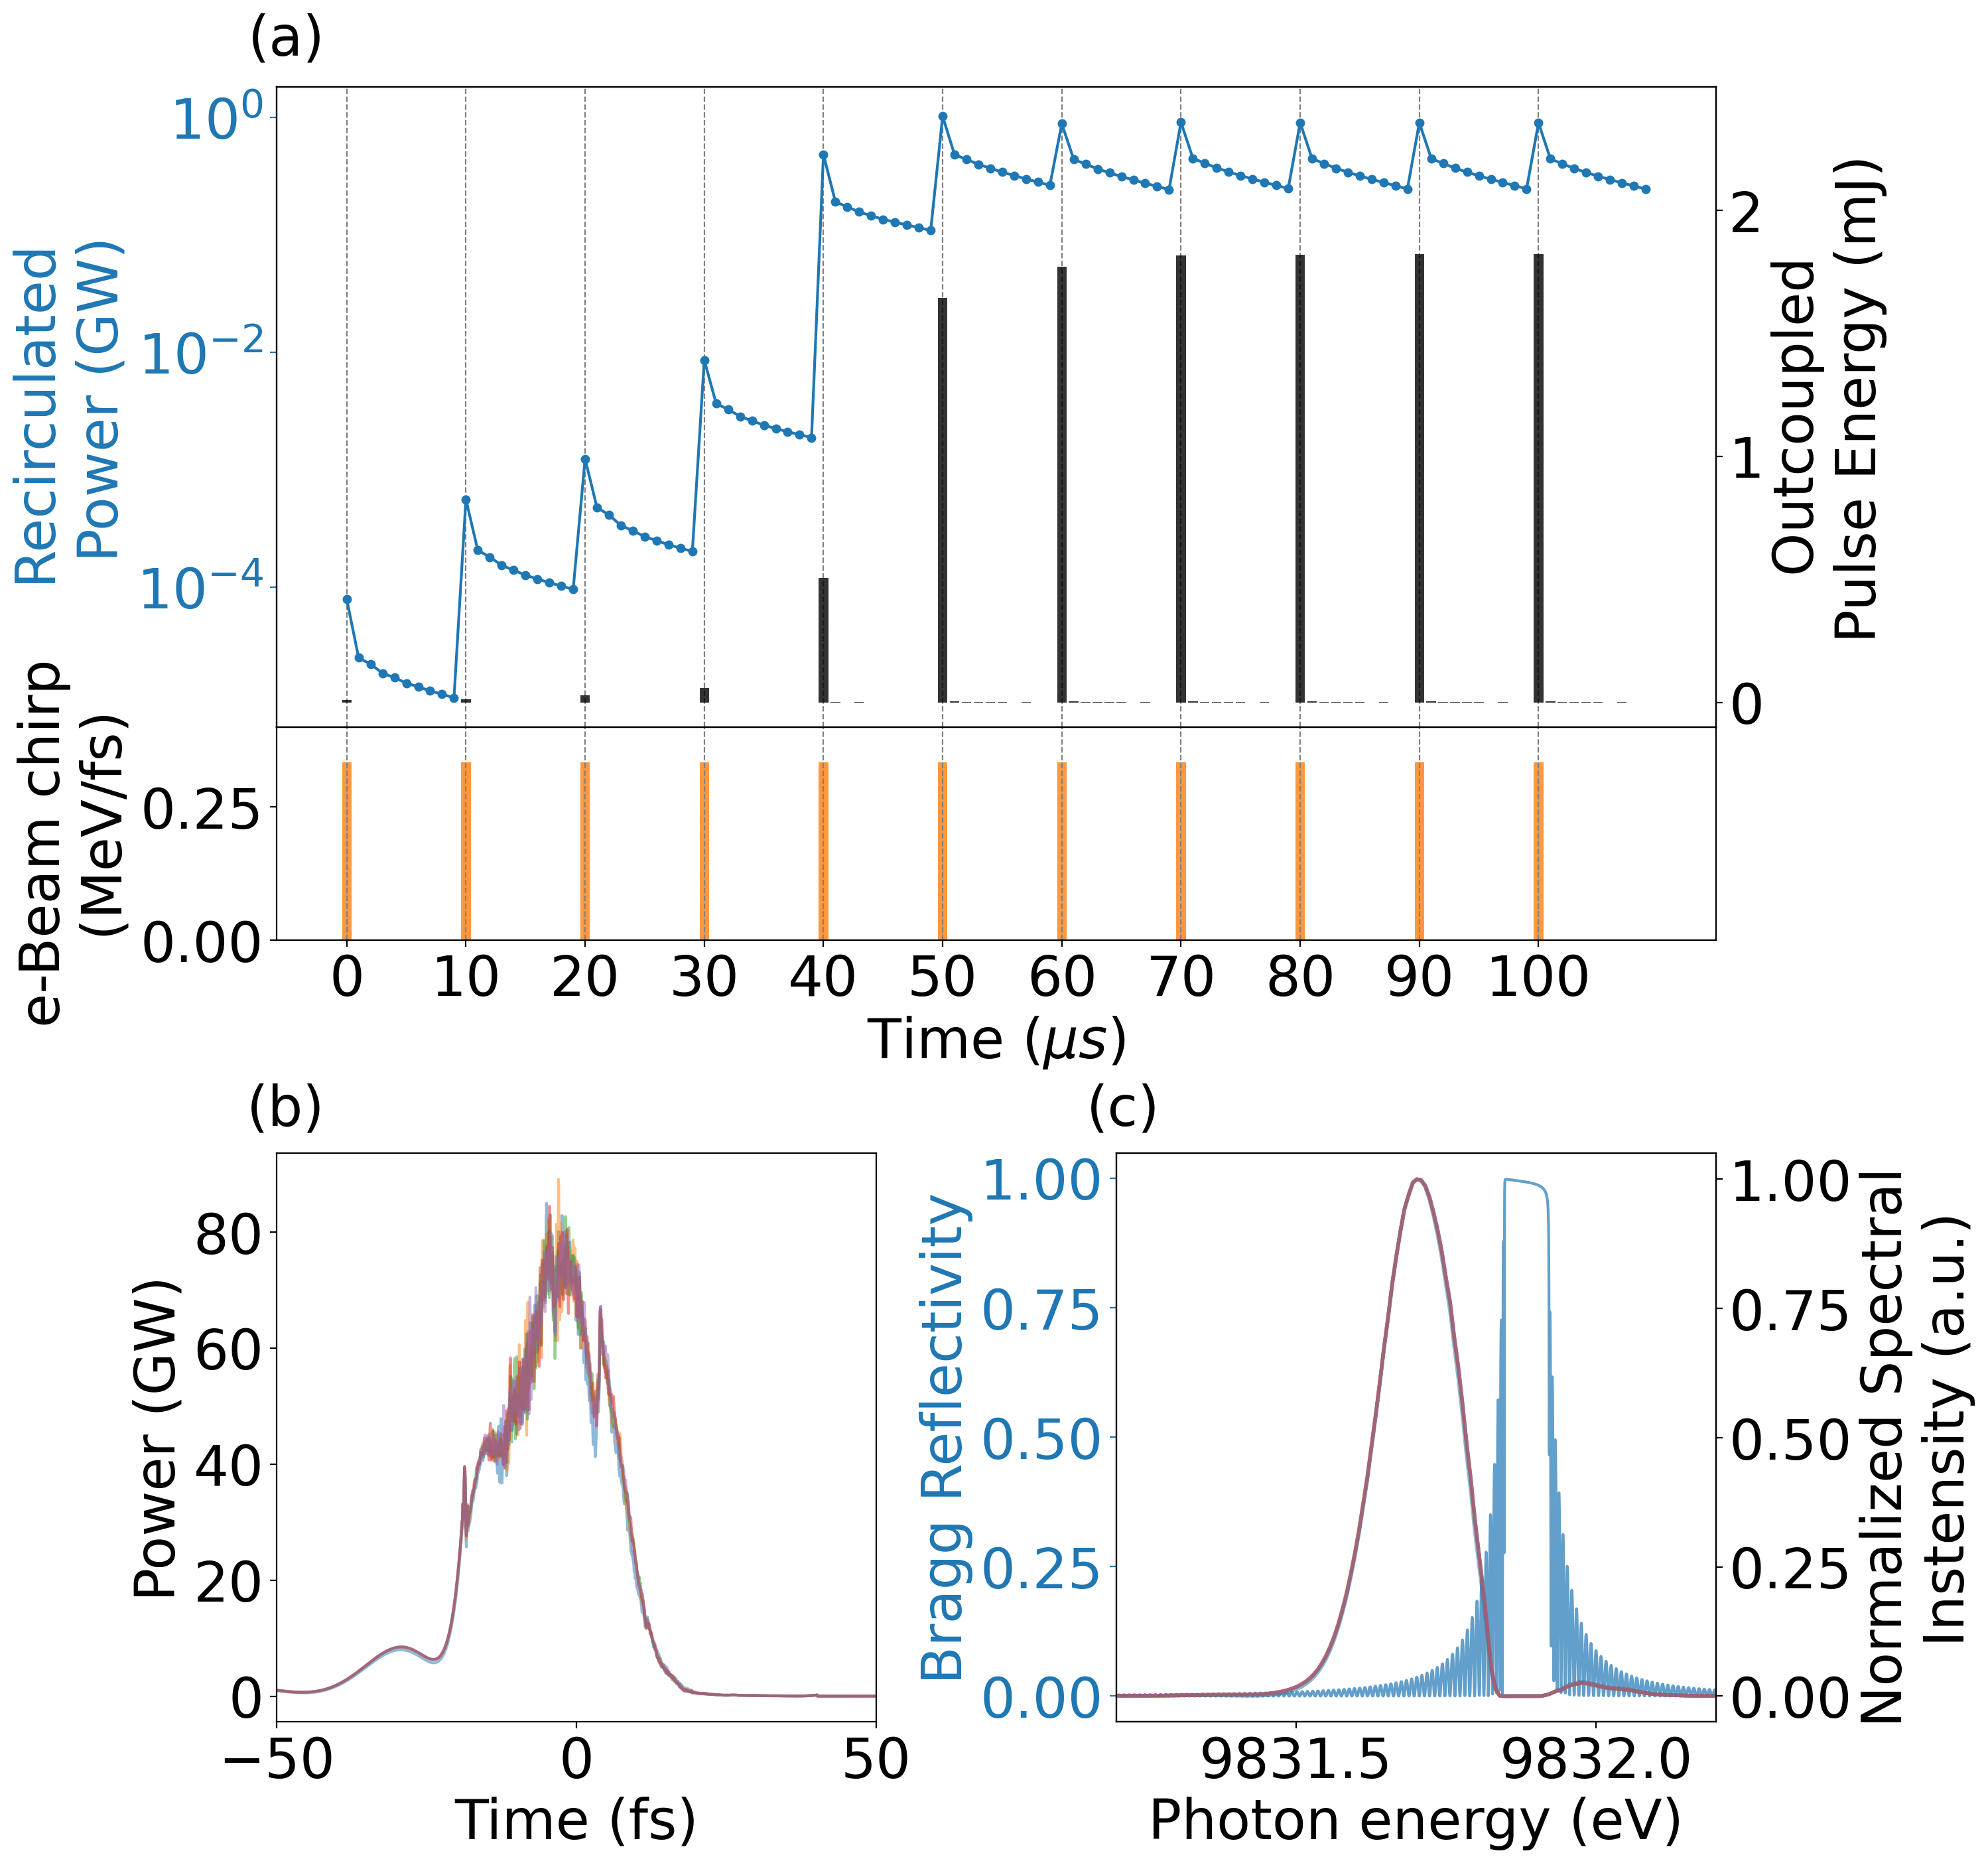

In [10]:
fontsize = 30
fig = plt.figure(figsize=(14, 16))
#grid = plt.GridSpec(3, 2, wspace=0.3, hspace=0.4)
#main_ax = plt.subplot(grid[0, :])
#charge_ax = plt.subplot(grid[1,:], sharex = main_ax)

#power_ax = fig.add_subplot(grid[2, 0])
#spectra_ax = fig.add_subplot(grid[2, 1])


#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [3, 2], hspace=0.3) 
#make nested gridspecs
gs1 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[0], hspace = 0, height_ratios = [3,1])
gs2 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], wspace = 0.4)
main_ax = plt.subplot(gs1[0])
#main_ax.get_xaxis().set_visible(False)
charge_ax = plt.subplot(gs1[1], sharex = main_ax)


power_ax = plt.subplot(gs2[0])
spectra_ax = plt.subplot(gs2[1])


for s_fs, power in power_record:
    power_ax.plot(s_fs + 10, power/1e9, alpha = 0.5)
    power_ax.set_xlim([-50, 50])
power_ax.set_xlabel('Time (fs)', fontsize = fontsize)
power_ax.set_ylabel('Power (GW)', fontsize = fontsize)
power_ax.tick_params(axis='y', labelsize=fontsize)
power_ax.tick_params(axis='x', labelsize=fontsize)
power_ax.text(-0.05, 1.05, '(b)', transform=power_ax.transAxes, 
            size=fontsize)


spectra_ax.plot(Eph, R0H, color = 'C0', alpha = 0.7)
spectra_ax.set_xlim([9831.2,9832.2])
spectra_ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
spectra_ax2 = spectra_ax.twinx()
spectra_ax.text(-0.05, 1.05, '(c)', transform=spectra_ax.transAxes, 
            size=fontsize)


for hws, spectra in spectra_record0:
    spectra_ax2.plot(hws, spectra/np.max(spectra), alpha = 0.5, linewidth = 2)
    
#for hws, spectra in spectra_record1[1:]:
#    spectra_ax2.plot(hws, spectra/np.max(spectra), linewidth = 2, linestyle='dashed', color  = 'k', alpha = 0.5, label = 'Post-Unds')

display = (4,5)
handles, labels = spectra_ax2.get_legend_handles_labels()
#spectra_ax2.legend([handle for i,handle in enumerate(handles) if i in display],
#      [label for i,label in enumerate(labels) if i in display], loc = 'upper right', fontsize = fontsize-10)
    
spectra_ax.set_xlabel('Photon energy (eV)', fontsize = fontsize)
spectra_ax2.set_ylabel('Normalized Spectral \n Instensity (a.u.)', fontsize = fontsize)
spectra_ax.set_ylabel('Bragg Reflectivity',color  = 'C0', fontsize = fontsize)

spectra_ax.tick_params(axis='x', labelsize=fontsize)
#spectra_ax.set_xticks([9831,9832,9833])
spectra_ax2.tick_params(axis='y', labelsize=fontsize)
spectra_ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))





x = np.arange(len(recirc_power))
main_ax.plot(np.array(recirc_power),linestyle = 'solid', marker = 'o',markersize = 4)

#main_ax.plot(x[::10], recirc_power[::10],'o', color = 'C2', label = 'w/ chirped ebeam')
#plt.plot(x[240::120], power[240::120],'o', color = 'C1', label = 'w/ chirped ebeam')
#plt.plot([x[240],x[390],x[540], x[690], x[840], x[990]], [power[240], power[390], power[540], power[690], power[840], power[990]], 'o', label = 'w/ chirped ebeam')
#main_ax.legend(fontsize = fontsize, loc = 'upper left')
main_ax.set_yscale('log')
main_ax.set_xlabel('Time ($\mu s$)', fontsize =fontsize)
main_ax.set_ylabel('Recirculated \n Power (GW)', color = 'C0', fontsize=fontsize)

main_ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
main_ax.tick_params(axis='x', labelsize=fontsize)
main_ax2 = main_ax.twinx()

#main_ax2.plot(np.array(out_power)/1e3,linestyle = 'solid', marker = 'o',markersize = 4,color = 'k')
main_ax2.bar(np.arange(len(out_power)), np.array(out_power)/1e3,  color = 'k', alpha = 0.8 )
main_ax2.set_ylabel('Outcoupled \n Pulse Energy (mJ)', color = 'k', fontsize = fontsize)
#ax2.set_yscale('log')
main_ax2.tick_params(axis='y', labelsize=fontsize, colors = 'k')
main_ax2.set_ylim([-0.1,2.5 ])
main_ax.text(-0.02, 1.05, '(a)', transform=main_ax.transAxes, 
            size=fontsize)
main_ax.set_xticks(np.arange(len(recirc_power))[::10])
main_ax.grid(axis = 'x', color = 'gray', linestyle = 'dashed')


charge = np.zeros(np.array(recirc_power).shape)




chirp = np.zeros(np.array(recirc_power).shape)
#chirp[:] = np.nan
chirp[::10] = 1/3
charge_ax.bar(np.arange(len(chirp)), chirp,  color = 'C1', alpha = 0.8 )
charge_ax.set_ylabel('e-Beam chirp \n (MeV/fs)', fontsize =fontsize, color = 'k')
charge_ax.set_xticks(np.arange(len(chirp))[::10])



charge_ax.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
charge_ax.set_xlabel('Time ($\mu s$)', fontsize =fontsize)
charge_ax.tick_params(axis='x', labelsize=fontsize)
charge_ax.set_ylim([0,0.4])
#charge_ax.set_yticks([0,0.4])
charge_ax.tick_params(axis='y', labelsize=fontsize)


plt.savefig('figures/figure3_v5.pdf', bbox_inches ="tight")

## Figure 4 short cavity

In [16]:
ncar = 181
dgrid = 540e-6
w0 =40e-6
#xlamds = 1.7834064e-10
xlamds = 1.261043e-10
zsep = 140
c_speed  = 299792458
nslice = 1024
isradi = 1
verbosity = True
dt = xlamds*isradi*zsep/c_speed
folder_name = 'data_short_stats'

In [17]:
result = []
extrac = []
nRound = 22

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    result.extend(power_list)



for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_transmit' + '.txt'
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[1])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    extrac.extend(power_list)

recirc_power = result
out_power = extrac

In [18]:
fontsize = 14
power_record = []
spectra_record0 = []
spectra_record1 = []
for k in [6]:

    filename = 'n'+str(int(k)) + '_field_transmit_round0.dfl'
    print(filename)
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    power = np.sum(np.abs(fld)**2,axis = (1,2))
    s_fs = np.arange(len(power))*dt/1e-15
    s_fs -= np.mean(s_fs)
    power_record.append((s_fs, power))
    hws, spectra = get_spectrum(fld, zsep, xlamds, npad = 1000, onaxis=True)
    spectra_record0.append((hws, spectra))

    
    filename = 'tap0.006_K1.172_n' + str(k) + '.out.dfl'
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    hws, spectra = get_spectrum(fld, zsep, xlamds, npad = 4392, onaxis=True)
    spectra_record1.append((hws, spectra))

spectra_record2 = []
spectra_record3 = []
for k in [5]:
    filename = 'n'+str(int(k)) + '_field_transmit_round0.dfl'
    print(filename)
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    power = np.sum(np.abs(fld)**2,axis = (1,2))
    s_fs = np.arange(len(power))*dt/1e-15
    s_fs -= np.mean(s_fs)
    power_record.append((s_fs, power))
    hws, spectra = get_spectrum(fld, zsep, xlamds, npad = 1000, onaxis=True)
    spectra_record2.append((hws, spectra))

    
    filename = 'tap0.006_K1.172_n' + str(k) + '.out.dfl'
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    hws, spectra = get_spectrum(fld, zsep, xlamds, npad = 4392, onaxis=True)
    spectra_record3.append((hws, spectra))

n6_field_transmit_round0.dfl
2.9608078002929688 seconds to read in fld array (268509156,)
read 8196 slices
1.0728836059570312e-05 seconds to reshape fld array (8196, 181, 181)
0.6467103958129883 seconds to read in fld array (46258532,)
read 1412 slices
0.00016069412231445312 seconds to reshape fld array (1412, 181, 181)
n5_field_transmit_round0.dfl
7.263736724853516 seconds to read in fld array (268509156,)
read 8196 slices
5.7220458984375e-06 seconds to reshape fld array (8196, 181, 181)
0.7494213581085205 seconds to read in fld array (46258532,)
read 1412 slices
6.4373016357421875e-06 seconds to reshape fld array (1412, 181, 181)


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

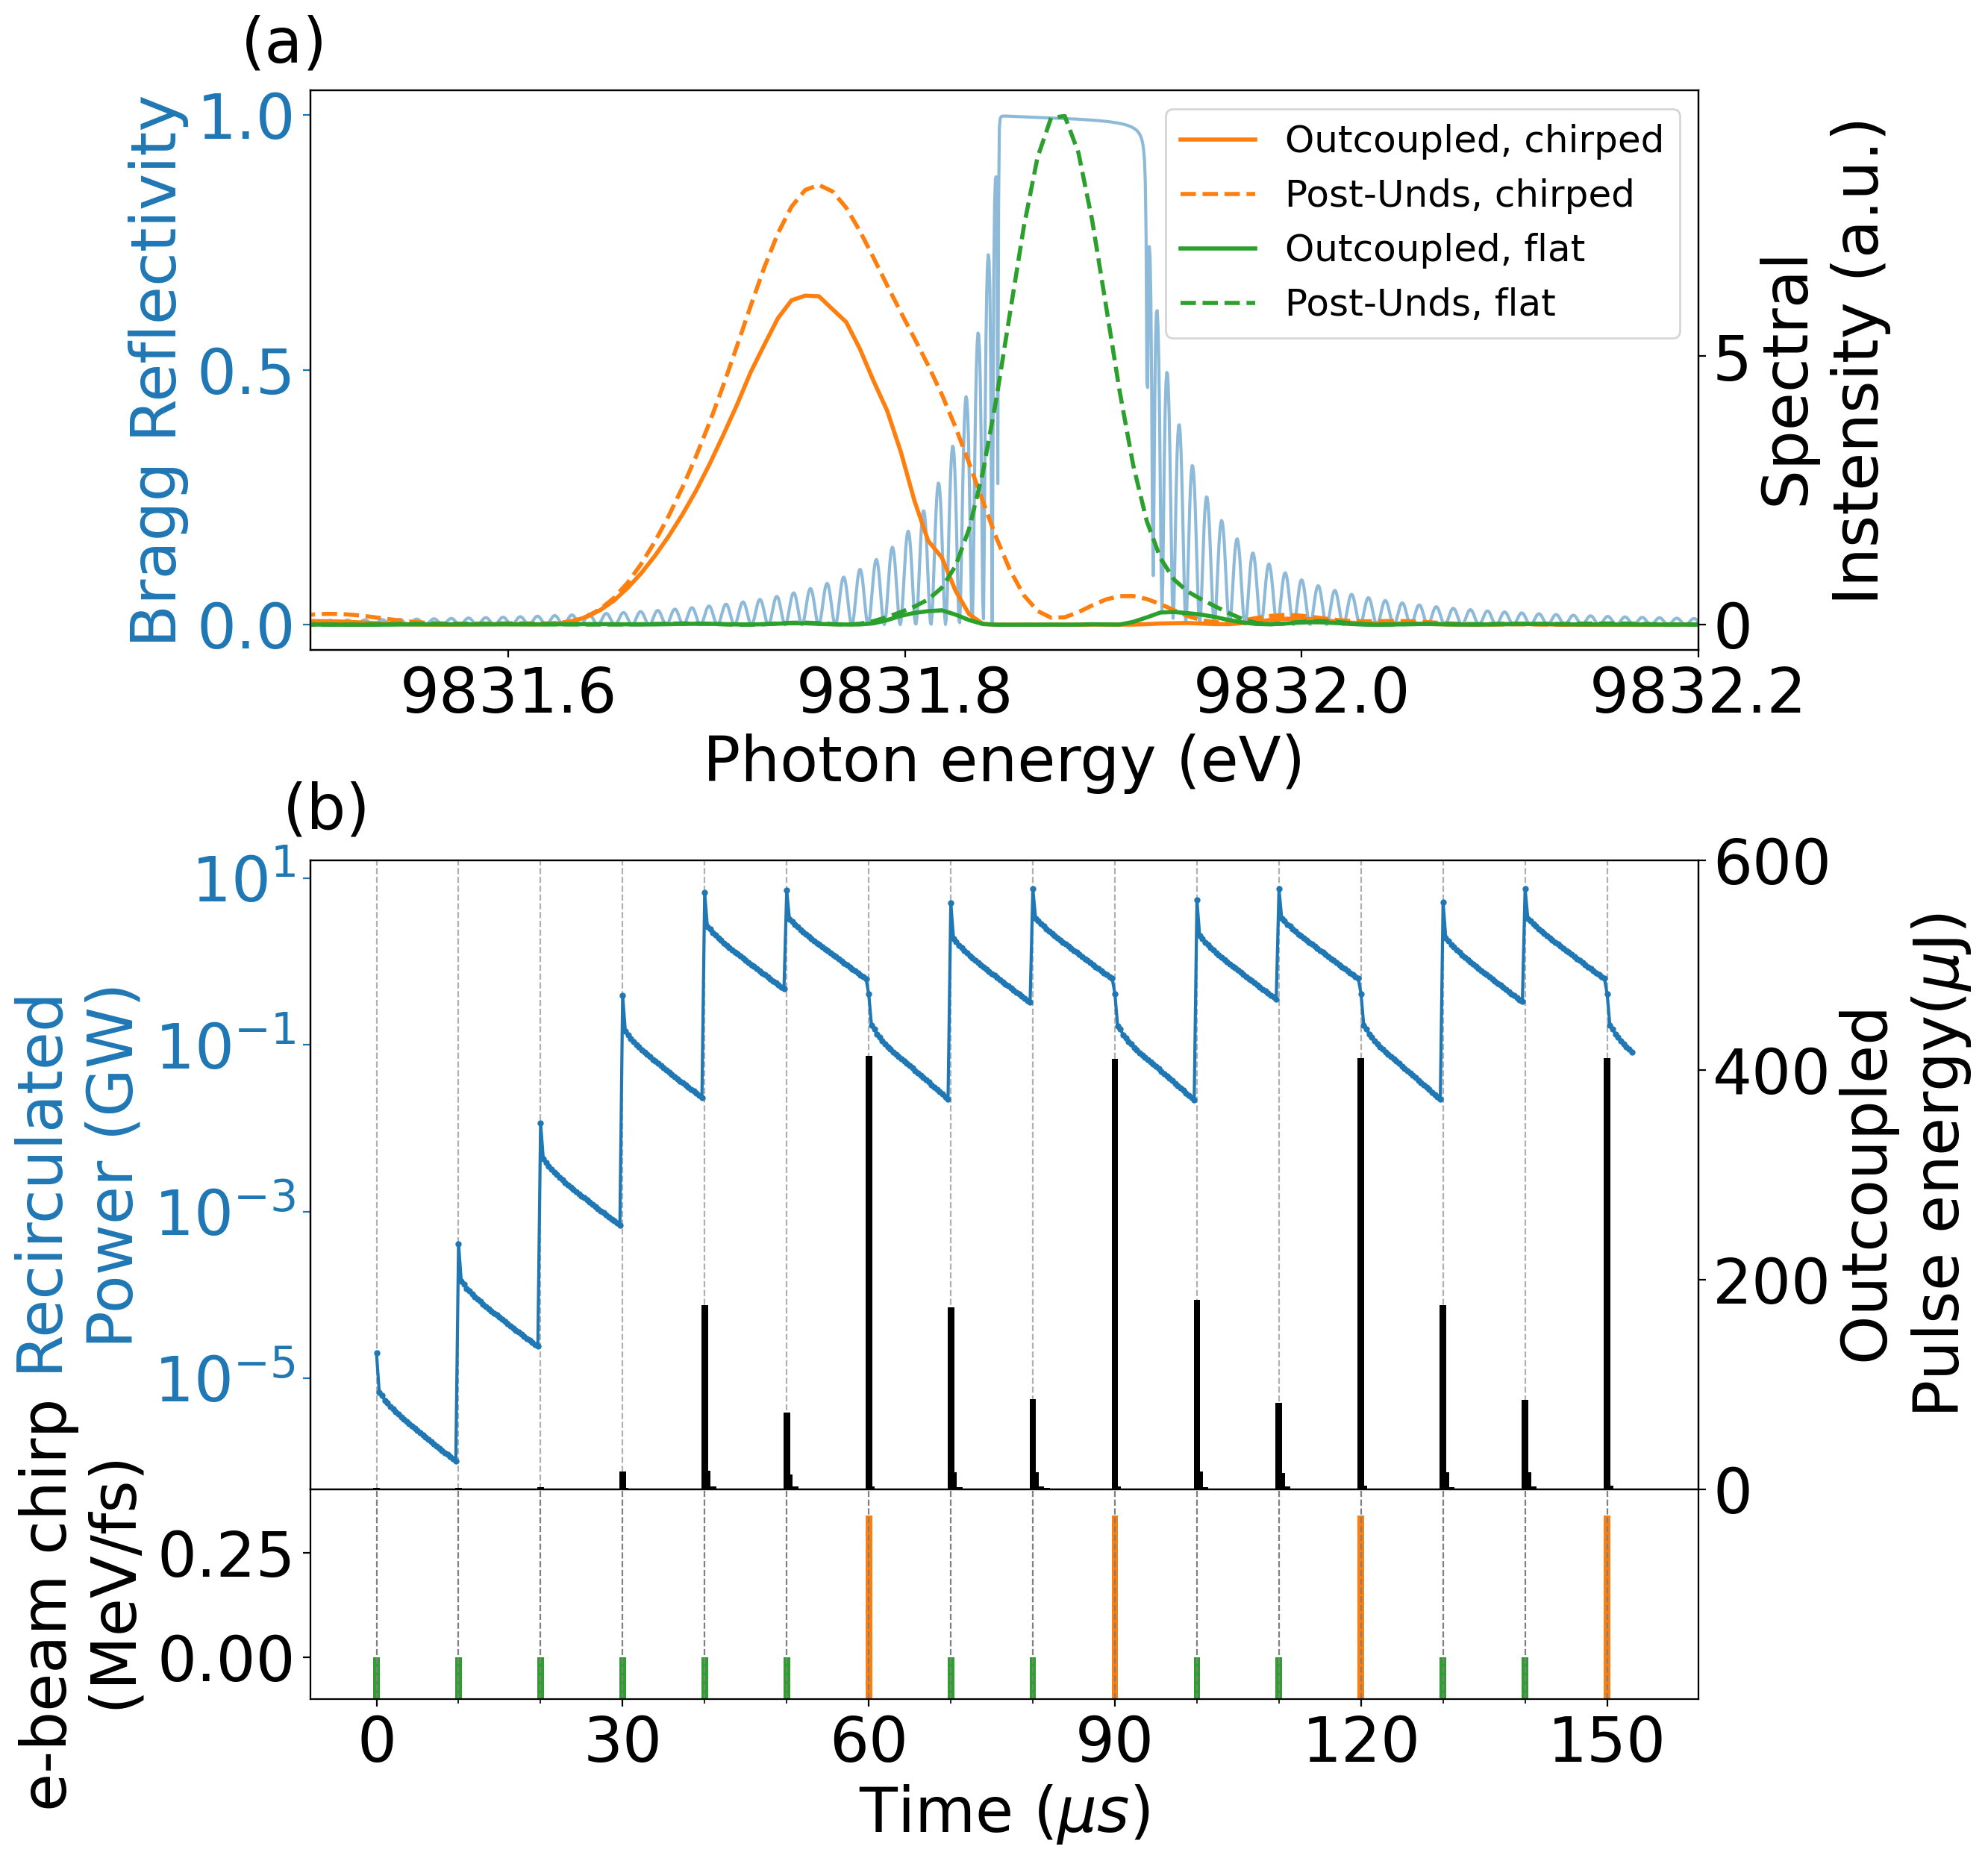

In [24]:
fontsize = 30
fig = plt.figure(figsize=(12, 14))
#grid = plt.GridSpec(3, 1, wspace=0.3, hspace=0.4)
#main_ax = fig.add_subplot(grid[1, 0])
#spectra_ax = fig.add_subplot(grid[0, 0])
#charge_ax = fig.add_subplot(grid[2, 0])

#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [2, 3], hspace = 0.3) 
#make nested gridspecs
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])
gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[1], hspace = 0, height_ratios = [3,1])
spectra_ax = plt.subplot(gs1[0])
#main_ax.get_xaxis().set_visible(False)
main_ax = plt.subplot(gs2[0])
charge_ax = plt.subplot(gs2[1], sharex = main_ax)




spectra_ax.plot(Eph, R0H, color = 'C0', alpha = 0.5)
spectra_ax.set_xlim([9831.5,9832.2])
spectra_ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
spectra_ax2 = spectra_ax.twinx()
spectra_ax.text(-0.05, 1.05, '(a)', transform=spectra_ax.transAxes, 
            size=fontsize)

for hws, spectra in spectra_record0:
    spectra_ax2.plot(hws, spectra/1e13, alpha = 1, linewidth = 2.0, color = 'C1', label = 'Outcoupled, chirped')
    
for hws, spectra in spectra_record1:
    spectra_ax2.plot(hws, spectra/1e13, linestyle='dashed', linewidth = 2.0,  color  = 'C1', alpha = 1.0, label = 'Post-Unds, chirped')
    
for hws, spectra in spectra_record2:
    spectra_ax2.plot(hws, spectra/1e13, alpha = 1, linewidth = 2.0, color = 'C2', label = 'Outcoupled, flat')
    
for hws, spectra in spectra_record3:
    spectra_ax2.plot(hws, spectra/1e13, linestyle='dashed',linewidth = 2.0, color  = 'C2', alpha = 1.0, label = 'Post-Unds, flat')

#display = (0,5)
#handles, labels = spectra_ax2.get_legend_handles_labels()
#spectra_ax2.legend([handle for i,handle in enumerate(handles) if i in display],
#      [label for i,label in enumerate(labels) if i in display], loc = 'best', fontsize = fontsize)
spectra_ax2.legend(fontsize = fontsize-12, loc = 'best')
#spectra_ax.legend(fontsize = fontsize-12, loc = 'best')
    
spectra_ax.set_xlabel('Photon energy (eV)', fontsize = fontsize)
spectra_ax2.set_ylabel('Spectral \n Instensity (a.u.)', fontsize = fontsize)
spectra_ax.set_ylabel('Bragg Reflectivity',color  = 'C0', fontsize = fontsize)

spectra_ax.tick_params(axis='x', labelsize=fontsize)
spectra_ax2.tick_params(axis='y', labelsize=fontsize)
spectra_ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))



##----------
index = np.arange(270, 360)
recirc_power2 = np.delete(np.array(recirc_power), index)
out_power2 = np.delete(np.array(out_power), index)
recirc_power2 = recirc_power2[:460]
out_power2 = out_power2[:460]
x = np.arange(len(recirc_power2))*1/3

main_ax.plot(x, np.array(recirc_power2),linestyle = 'solid', marker = 'o',markersize = 2)# label = 'w/o ebeam')
#main_ax.plot(x[::30], recirc_power[::30],'o', color = 'C2', label = 'flat')
#main_ax.plot(x[180::90], recirc_power[180::90],'o', color = 'C1', label = 'chirped')
#plt.plot(x[240::120], power[240::120],'o', color = 'C1', label = 'w/ chirped ebeam')
#plt.plot([x[240],x[390],x[540], x[690], x[840], x[990]], [power[240], power[390], power[540], power[690], power[840], power[990]], 'o', label = 'w/ chirped ebeam')

main_ax.set_yscale('log')
main_ax.set_xlabel('Time ($\mu s$)', fontsize =fontsize)
main_ax.set_ylabel('Recirculated \n Power (GW)', color = 'C0', fontsize=fontsize)
main_ax.set_xticks(ticks = x[::90])

main_ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
main_ax.tick_params(axis='x', labelsize=fontsize)

main_ax.set_xticks(x[::30], minor=True)
main_ax.grid(axis = 'x', which='minor',linestyle = 'dashed')
main_ax.grid(axis = 'x',linestyle = 'dashed')

main_ax2 = main_ax.twinx()

#main_ax2.plot(x, np.array(out_power2), linestyle = 'solid', marker = 'o',markersize = 1,color = 'k', alpha = 0.7)
main_ax2.bar(x,  np.array(out_power2),  color = 'k')


main_ax2.set_ylabel('Outcoupled \n Pulse energy'+r'($\mu$J)', color = 'k', fontsize = fontsize)
main_ax2.set_ylim([0,600])

#ax2.set_yscale('log')
main_ax2.tick_params(axis='y', labelsize=fontsize, colors = 'k')
main_ax.text(-0.02, 1.05, '(b)', transform=main_ax.transAxes, 
            size=fontsize)



charge = np.zeros(np.array(recirc_power2).shape)


beamchirp = 27/80
bottom = -0.1
chirp = np.zeros(np.array(recirc_power2).shape)
chirp[:] = np.nan
chirp[::30] = 0
charge_ax.bar(x,  chirp - bottom, bottom = bottom, color = 'C2' )

chirp[:] = np.nan
chirp[180::90]  = beamchirp
charge_ax.bar(x,  chirp - bottom, bottom = bottom, color = 'C1')


charge_ax.set_ylim([bottom,0.4])
charge_ax.set_ylabel('e-beam chirp \n (MeV/fs)', fontsize =fontsize, color = 'k')
charge_ax.tick_params(axis='x', labelsize=fontsize)
charge_ax.tick_params(axis='y', labelsize=fontsize)
#charge_ax.set_yticks([0,beamchirp])


charge_ax.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
charge_ax.grid(axis = 'x', color = 'gray', linestyle = 'dashed',which='minor')
charge_ax.set_xlabel('Time ($\mu s$)', fontsize =fontsize)





plt.savefig('figures/figure4_v5.pdf', bbox_inches ="tight")

### 3GeV figure

In [25]:
folder_name = 'data_3GeV_short1'
result = []
extrac = []
nRound =20

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    result.extend(power_list)



for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_transmit' + '.txt'
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[1])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    extrac.extend(power_list)

recirc_power = result
out_power = extrac

In [26]:
ncar = 181
zsep = 50
xlamds = 1.7834064e-10
dt = zsep*xlamds/299792458
fontsize = 14
power_record = []
spectra_record0 = []
spectra_record1 = []
for k in np.arange(7, 11):

    filename = 'n'+str(int(k)) + '_field_transmit_round0.dfl'
    print(filename)
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    power = np.sum(np.abs(fld)**2,axis = (1,2))
    s_fs = np.arange(len(power))*dt/1e-15
    s_fs -= np.mean(s_fs)
    power_record.append((s_fs, power))
    hws, spectra = get_spectrum(fld,  zsep, xlamds,  npad = 1000, onaxis=True)
    spectra_record0.append((hws, spectra))

n7_field_transmit_round0.dfl
3.1465930938720703 seconds to read in fld array (268509156,)
read 8196 slices
0.0006103515625 seconds to reshape fld array (8196, 181, 181)
n8_field_transmit_round0.dfl
4.64690375328064 seconds to read in fld array (268509156,)
read 8196 slices
5.4836273193359375e-06 seconds to reshape fld array (8196, 181, 181)
n9_field_transmit_round0.dfl
4.151320457458496 seconds to read in fld array (268509156,)
read 8196 slices
5.0067901611328125e-06 seconds to reshape fld array (8196, 181, 181)
n10_field_transmit_round0.dfl
4.563823938369751 seconds to read in fld array (268509156,)
read 8196 slices
0.0006291866302490234 seconds to reshape fld array (8196, 181, 181)


1.5048612563882498e-05


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

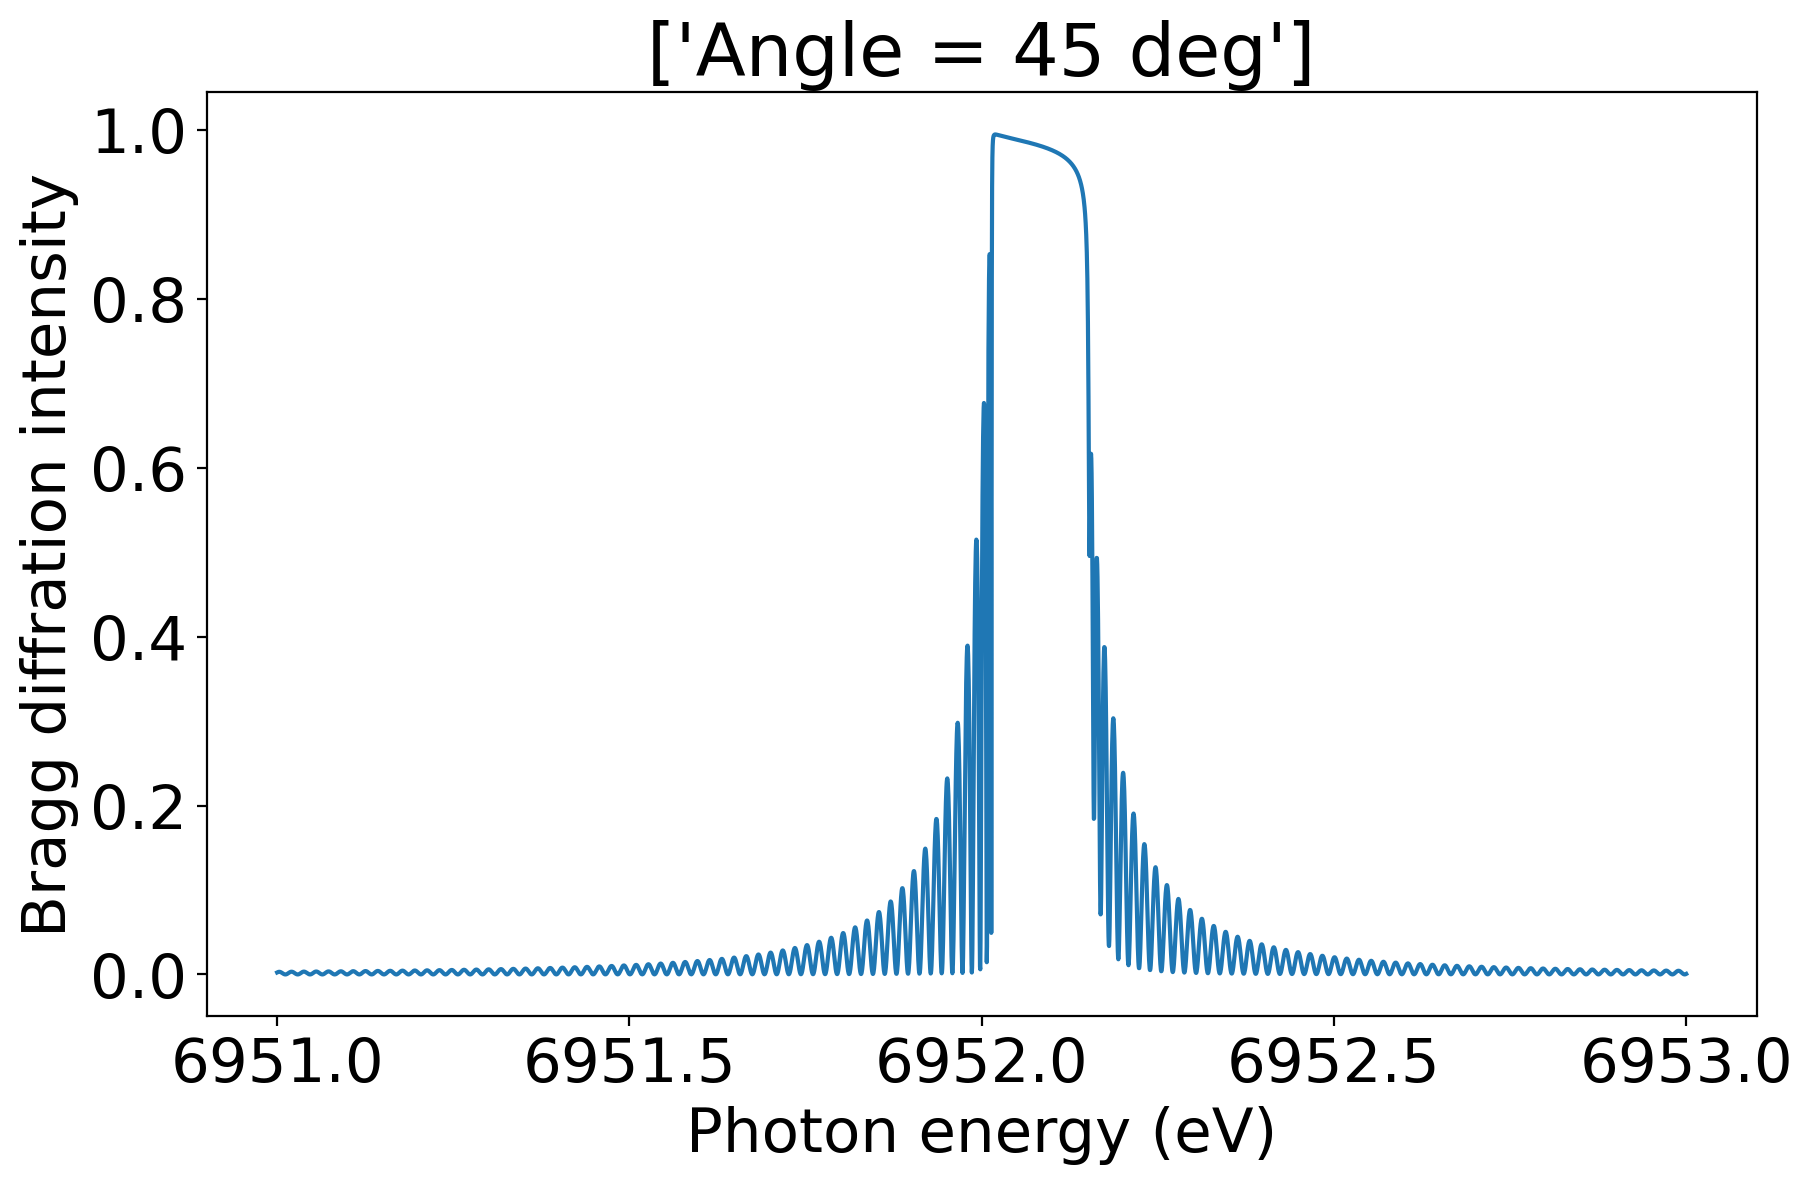

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

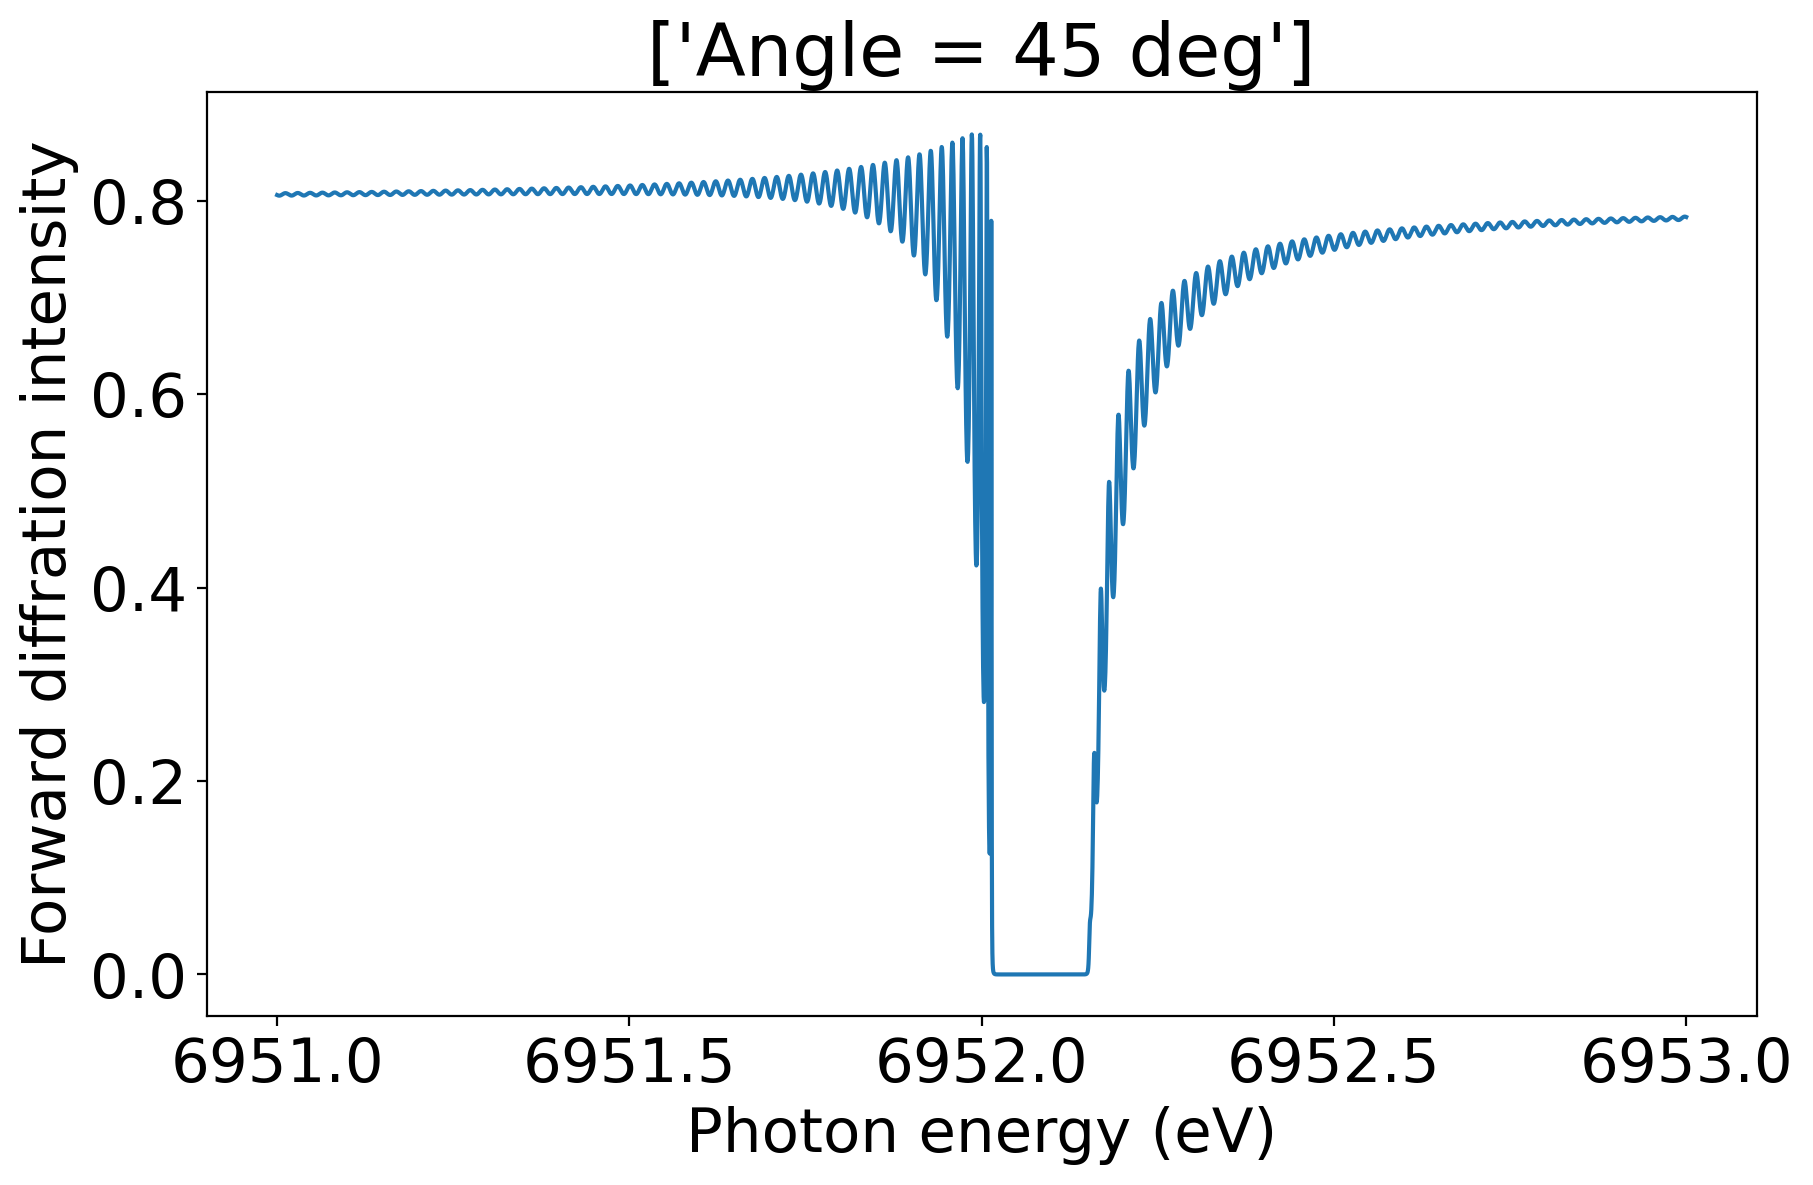

In [27]:
from cavity_codes.Bragg_mirror2 import *
Eph, R0H, R00 = plot_Bragg_mirror_response_slice(d = 50e-6)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

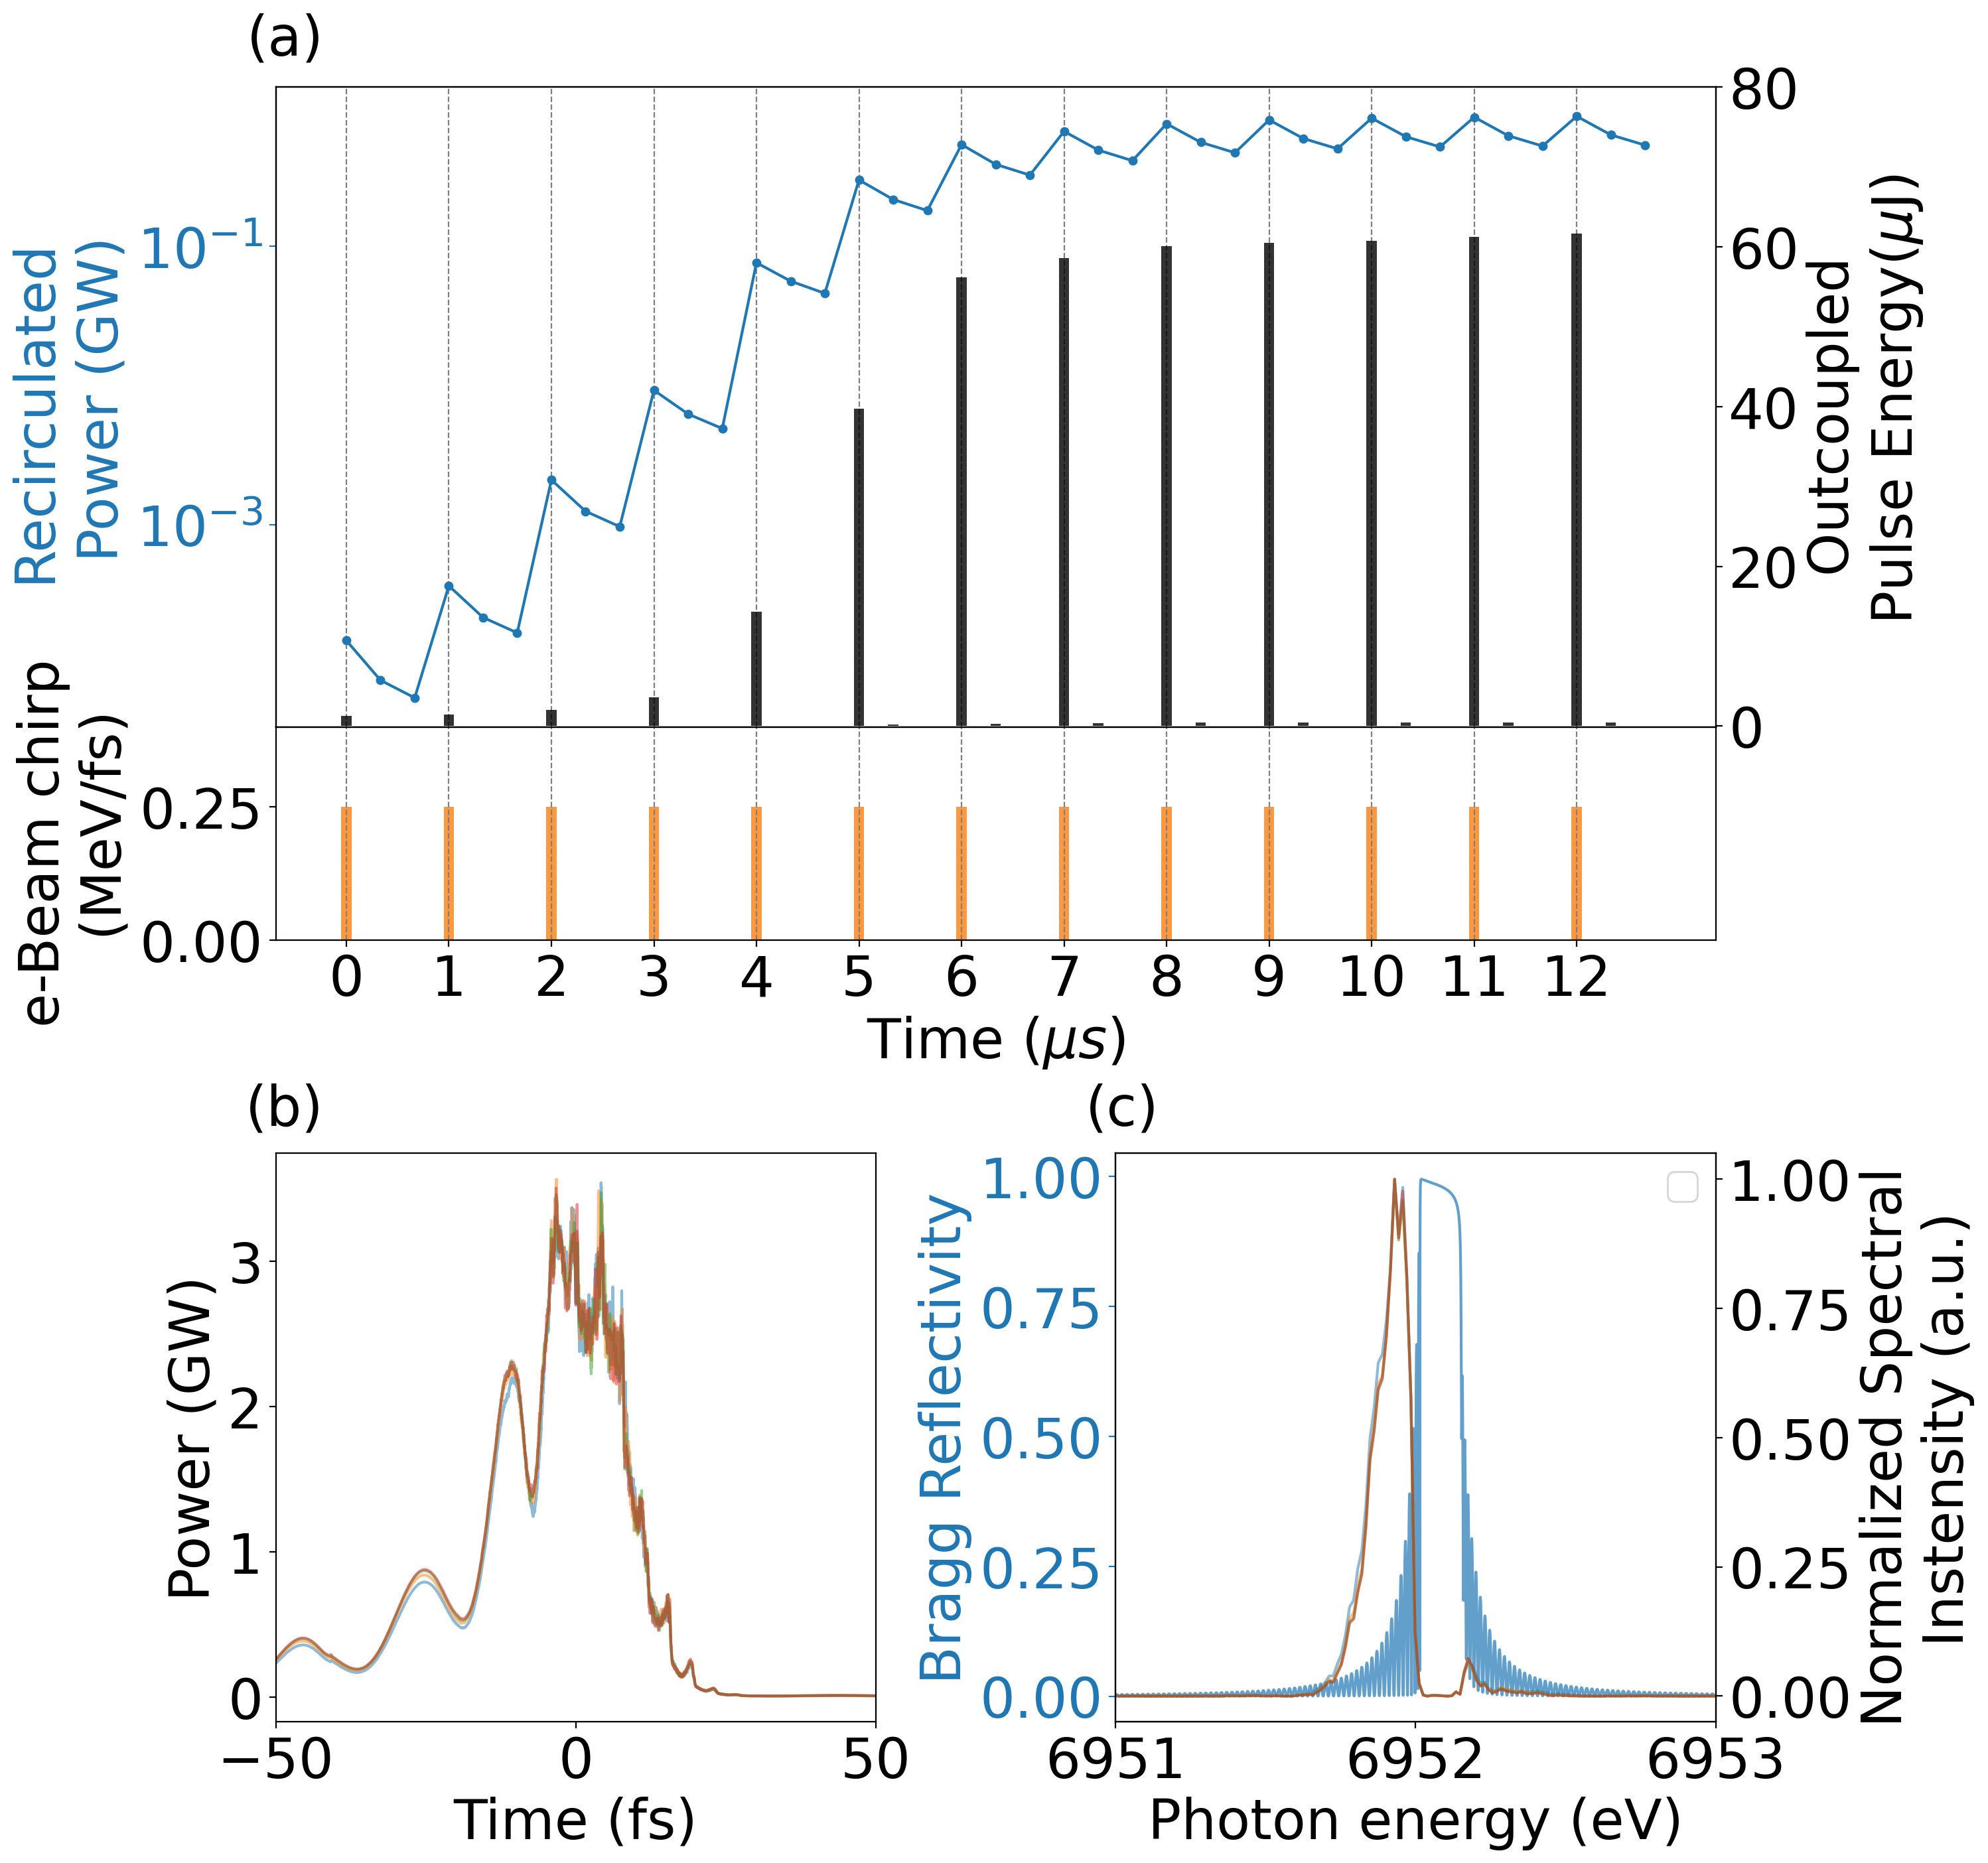

In [31]:
fontsize = 30
fig = plt.figure(figsize=(14, 16))
#grid = plt.GridSpec(3, 2, wspace=0.3, hspace=0.4)
#main_ax = plt.subplot(grid[0, :])
#charge_ax = plt.subplot(grid[1,:], sharex = main_ax)

#power_ax = fig.add_subplot(grid[2, 0])
#spectra_ax = fig.add_subplot(grid[2, 1])


#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [3, 2], hspace=0.3) 
#make nested gridspecs
gs1 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[0], hspace = 0, height_ratios = [3,1])
gs2 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], wspace = 0.4)
main_ax = plt.subplot(gs1[0])
#main_ax.get_xaxis().set_visible(False)
charge_ax = plt.subplot(gs1[1], sharex = main_ax)


power_ax = plt.subplot(gs2[0])
spectra_ax = plt.subplot(gs2[1])


for s_fs, power in power_record:
    power_ax.plot(s_fs + 10, power/1e9, alpha = 0.5)
    power_ax.set_xlim([-50, 50])
power_ax.set_xlabel('Time (fs)', fontsize = fontsize)
power_ax.set_ylabel('Power (GW)', fontsize = fontsize)
power_ax.tick_params(axis='y', labelsize=fontsize)
power_ax.tick_params(axis='x', labelsize=fontsize)
power_ax.text(-0.05, 1.05, '(b)', transform=power_ax.transAxes, 
            size=fontsize)


spectra_ax.plot(Eph, R0H, color = 'C0', alpha = 0.7)
spectra_ax.set_xlim([6951,6953])
spectra_ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
spectra_ax2 = spectra_ax.twinx()
spectra_ax.text(-0.05, 1.05, '(c)', transform=spectra_ax.transAxes, 
            size=fontsize)

for hws, spectra in spectra_record0:
    spectra_ax2.plot(hws, spectra/np.max(spectra), alpha = 0.5, label = 'Outcoupled')
    
#for hws, spectra in spectra_record1[1:]:
#    spectra_ax2.plot(hws, spectra/np.max(spectra), linestyle='dashed', color  = 'k', alpha = 0.5, label = 'Post-Unds')

display = (4,5)
handles, labels = spectra_ax2.get_legend_handles_labels()
spectra_ax2.legend([handle for i,handle in enumerate(handles) if i in display],
      [label for i,label in enumerate(labels) if i in display], loc = 'upper right', fontsize = fontsize-10)
    
spectra_ax.set_xlabel('Photon energy (eV)', fontsize = fontsize)
spectra_ax2.set_ylabel('Normalized Spectral \n Instensity (a.u.)', fontsize = fontsize)
spectra_ax.set_ylabel('Bragg Reflectivity',color  = 'C0', fontsize = fontsize)

spectra_ax.tick_params(axis='x', labelsize=fontsize)
#spectra_ax.set_xticks([9831,9832,9833])
spectra_ax2.tick_params(axis='y', labelsize=fontsize)
spectra_ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))





x = np.arange(len(recirc_power))*1/3
main_ax.plot(x[:39], np.array(recirc_power)[:39],linestyle = 'solid', marker = 'o',markersize = 4)
#main_ax.plot(x[::10], recirc_power[::10],'o', color = 'C2', label = 'w/ chirped ebeam')
#plt.plot(x[240::120], power[240::120],'o', color = 'C1', label = 'w/ chirped ebeam')
#plt.plot([x[240],x[390],x[540], x[690], x[840], x[990]], [power[240], power[390], power[540], power[690], power[840], power[990]], 'o', label = 'w/ chirped ebeam')
#main_ax.legend(fontsize = fontsize, loc = 'upper left')
main_ax.set_yscale('log')
main_ax.set_xlabel('Time ($\mu s$)', fontsize =fontsize)
main_ax.set_ylabel('Recirculated \n Power (GW)', color = 'C0', fontsize=fontsize)

main_ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
main_ax.tick_params(axis='x', labelsize=fontsize)
main_ax2 = main_ax.twinx()

#main_ax2.plot(x[:39], np.array(out_power)[:39],linestyle = 'solid', marker = 'o',markersize = 4,color = 'k')
main_ax2.bar(x[:39],  np.array(out_power)[:39],  color = 'k',alpha = 0.8,width = 0.1 )

main_ax2.set_ylabel('Outcoupled \n Pulse Energy'+r'($\mu$J)', color = 'k', fontsize = fontsize)
#ax2.set_yscale('log')
main_ax2.tick_params(axis='y', labelsize=fontsize, colors = 'k')
main_ax2.set_ylim([-0.1,80 ])
main_ax.text(-0.02, 1.05, '(a)', transform=main_ax.transAxes, 
            size=fontsize)
#main_ax.set_xticks(np.arange(len(recirc_power))[:39:3])
main_ax.grid(axis = 'x', color = 'gray', linestyle = 'dashed')


charge = np.zeros(np.array(recirc_power).shape)




chirp = np.zeros(np.array(recirc_power).shape)
#chirp[:] = np.nan
chirp[::3] = 0.25
charge_ax.bar(x[:39],  chirp[:39],  color = 'C1', alpha = 0.8,width = 0.1 )
charge_ax.set_ylabel('e-Beam chirp \n (MeV/fs)', fontsize =fontsize, color = 'k')
charge_ax.set_xticks(x[:39:3])



charge_ax.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
charge_ax.set_xlabel('Time ($\mu s$)', fontsize =fontsize)
charge_ax.tick_params(axis='x', labelsize=fontsize)
charge_ax.set_ylim([0,0.4])
#charge_ax.set_yticks([0,0.7])
charge_ax.tick_params(axis='y', labelsize=fontsize)


plt.savefig('figures/figure5_v5.pdf', bbox_inches ="tight")

In [61]:
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
data = pickle.load( open( "data_3GeV_short1/power_z.p", "rb" ) )

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


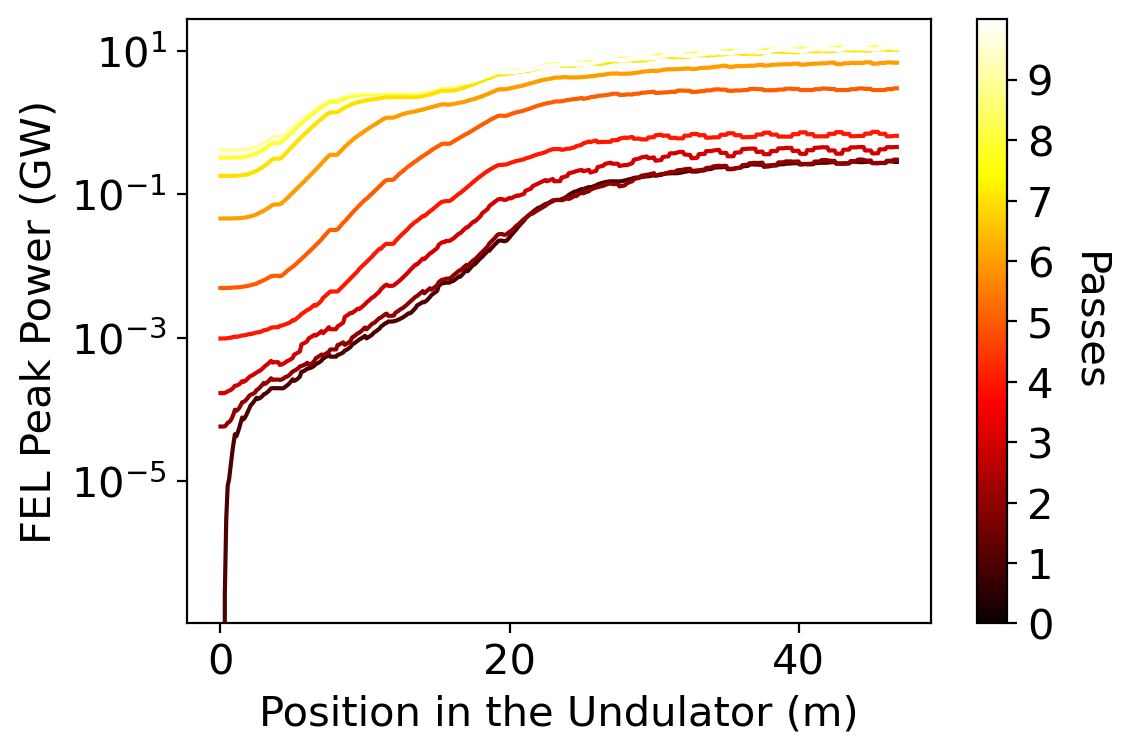

In [66]:
fontsize = 15
zlist = data[0]
power_vs_z = data[1]
c = np.arange(power_vs_z.shape[0])
norm = mpl.colors.Normalize(vmin=0, vmax=power_vs_z.shape[0])
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.hot)
cmap.set_array([])

count = 0
fig, ax = plt.subplots(dpi=100)
for p in power_vs_z:
    ax.plot(zlist, p,c=cmap.to_rgba(count + 1))
    ax.set_yscale('log')
    count += 1
    
clb = fig.colorbar(cmap, ticks=c)
clb.ax.tick_params(labelsize=fontsize) 
clb.ax.get_yaxis().labelpad = 20
clb.ax.set_ylabel('Passes',fontsize=fontsize, rotation=270)
    
plt.xlabel('Position in the Undulator (m)', fontsize = fontsize)
plt.ylabel('FEL Peak Power (GW)', fontsize= fontsize)
plt.tick_params(axis='y', labelsize=fontsize, colors = 'k')
plt.tick_params(axis = 'x', labelsize=  fontsize, colors = 'k')
plt.savefig('figures/3GeV_v3.pdf', bbox_inches ="tight")

## Plot for SM

In [17]:
# inferno reversed colormap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
my_cmap = cm.get_cmap('inferno_r')
# my_cmap.set_under('w') # don't seem too work
xr = np.linspace(0, 1, 256)
my_cmap_listed = my_cmap(xr)
my_cmap_listed = np.vstack((np.array([np.ones(4)+(my_cmap_listed[0]-np.ones(4))*x for x in np.linspace(0,1,int(256/8))]),my_cmap_listed[:-int(256/16)]))
my_cmap = ListedColormap(my_cmap_listed)

cmap0 = LinearSegmentedColormap.from_list('', ['white', *plt.cm.inferno_r(np.arange(255))])
colorlist=['#f3ffa0', '#6BCAE2', '#72bda3', '#ed6a5a', '#533a71']
colorlist2=['#E2836A','#6a7ee2','#74e26a']

def make_plot(lpath,filename,tax = None, nbins = 200,show_current = True,
              xrange = None, ylim = None,  tscale = 'fs', Iscale = 'kA', Escale = 'GeV', annote = None):
    mc2 = 0.51099895000e6
    fontsize = 22
    # load data
    ff = SDDS.readSDDS(lpath + '/' + filename)
    parameters, bunches = ff.read()
    print('number of bunches: ', bunches.shape[0],' \t particles in bunch 0: ', bunches.shape[1])
    d = bunches[0].T # particle data
    npart = bunches.shape[1] # number of macroparticles
    charge = parameters[0]['Charge']
  
    
    # center in time
    d[4,:] -= np.mean(d[4,:])
    
    if tscale == 'fs':
        scale = 1e15
    elif tscale == 'ps':
        scale = 1e12
        
    if Iscale == 'A':
        scale2 = 1
    elif Iscale == 'kA':
        scale2 = 1e3
    
    if Escale == 'GeV':
        scale3 = 1e9
    elif Escale == 'MeV':
        scale3 = 1e6
        
    if xrange:
        d = d[:,(d[4,:]*scale>=xrange[0])&(d[4,:]*scale<=xrange[1])]
        charge = charge*d.shape[1]/npart
        
    tt = -d[4,:]
    energy = d[5,:]*mc2
    
    if not tax:
        plt.figure()
        tax = plt.gca()
    
        
    h, xedges, yedges, _ = tax.hist2d(tt*scale,energy/scale3,
                       bins = nbins,  cmap = cmap0, rasterized = True)
    tax.set_xlabel('Time (' + tscale + ')', fontsize = fontsize)
    tax.set_ylabel('Energy (' + Escale + ')', fontsize = fontsize)
    tax.tick_params(axis = 'x', labelsize = fontsize)
    tax.tick_params(axis = 'y', labelsize = fontsize)
    
    tcoords = 0.5*(xedges[1:]+xedges[:-1])
    Icoords = np.sum(h,axis=1) / np.sum(h) * charge/scale2 / np.mean(np.diff(tcoords))*scale
    
    
    
    if show_current:
        ax_I = tax.twinx()

        

        ax_I.plot(tcoords, Icoords, linewidth = 2, color = 'C0')
        ax_I.set_ylabel('Current ('+Iscale+ ')', color = 'C0', fontsize = fontsize)
        ax_I.tick_params(axis='y', colors = 'C0',labelsize = fontsize)
        
    if annote:   
        tax.annotate(annote,xy = (-0.2, 1.1), xycoords = 'axes fraction', fontsize = fontsize)
    #peak_t = tcoords[np.argmax(Icoords)]
    
    if ylim:
        tax.set_ylim(ylim)
    
    #if xlim:
    #    plt.xlim(xlim)
    #plt.show()
    #plt.close()

number of bunches:  1  	 particles in bunch 0:  1000001
number of bunches:  1  	 particles in bunch 0:  1000001
number of bunches:  1  	 particles in bunch 0:  1000001


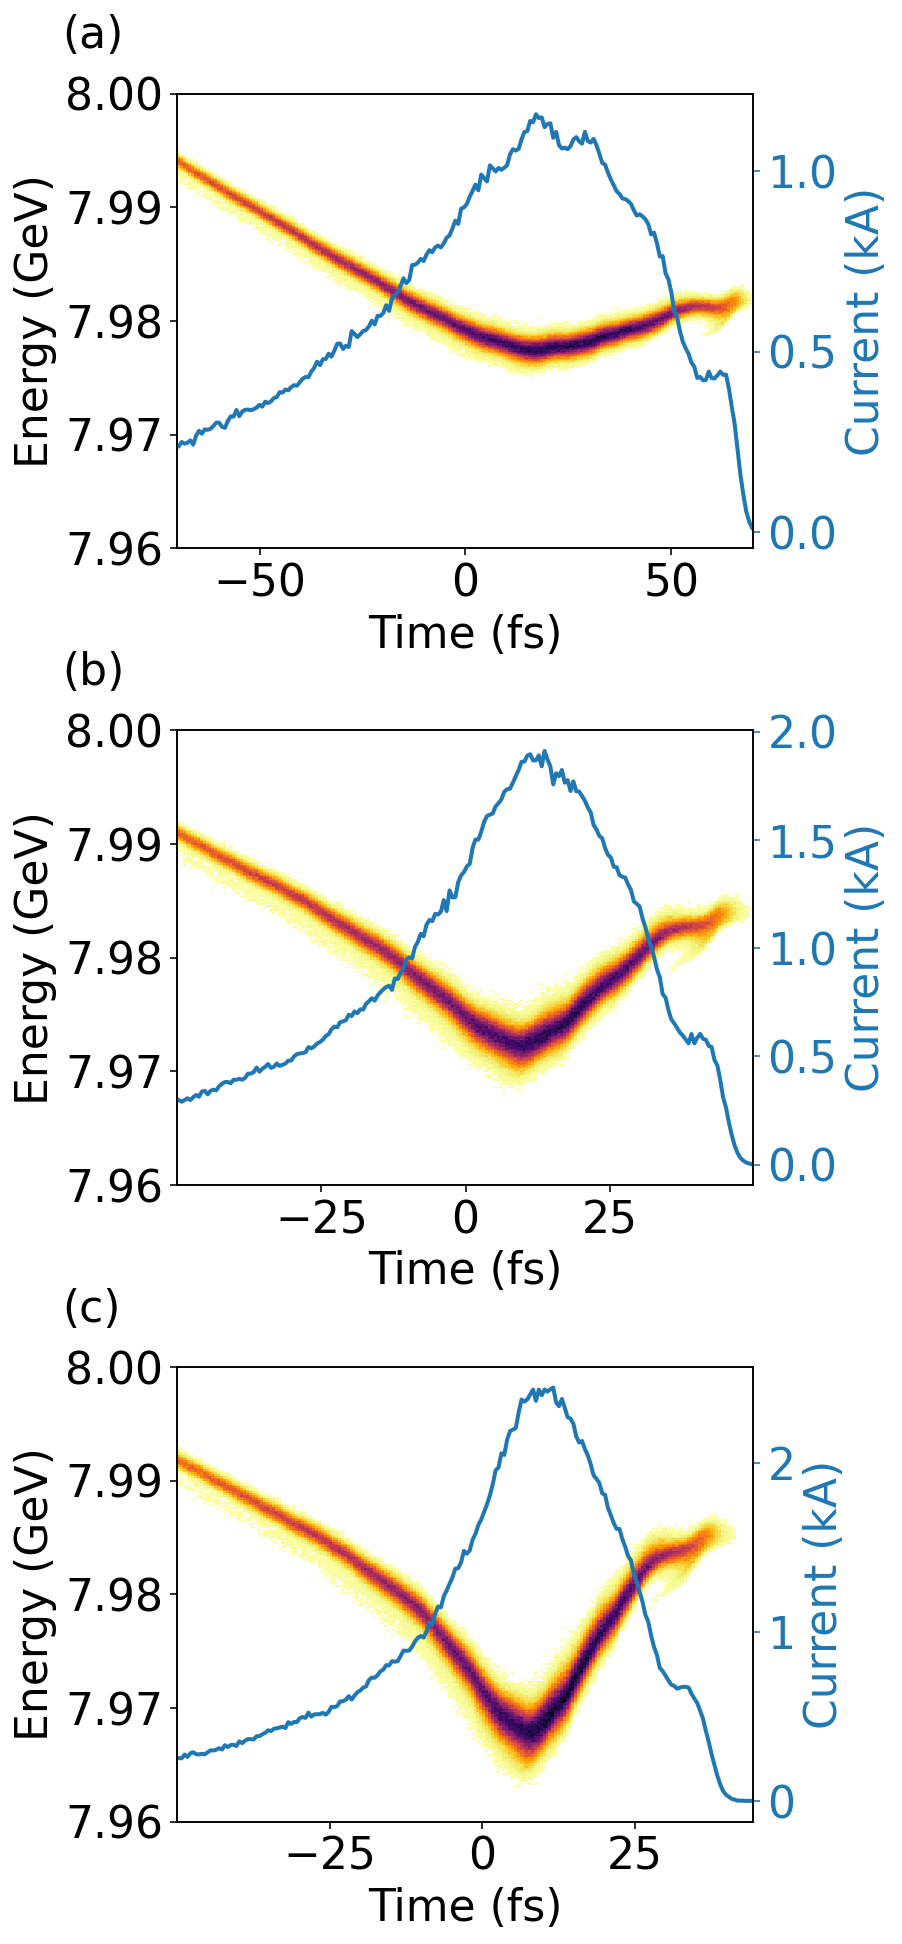

In [20]:
fig, ax = plt.subplots(3, 1,figsize=(5,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)


lpath = '/sdf/group/beamphysics/jytang/genesis/CBXFEL/fromZhen/XAMP_0.0/CAV2PHASE_-23/'
filename = 'HXRSTART.out'
make_plot(lpath,filename,tax = ax[0], tscale = 'fs', Iscale = 'kA', Escale = 'GeV', xrange = [-70, 70],annote = "(a)", ylim = [7.96, 8.0])


lpath = '/sdf/group/beamphysics/jytang/genesis/CBXFEL/fromZhen/XAMP_0.22/CAV2PHASE_-23/'
filename = 'HXRSTART.out'
make_plot(lpath,filename,tax = ax[1], tscale = 'fs', Iscale = 'kA', Escale = 'GeV', xrange = [-50, 50],annote = "(b)", ylim = [7.96, 8.0])

lpath = '/sdf/group/beamphysics/jytang/genesis/CBXFEL/fromZhen/XAMP_0.3/CAV2PHASE_-23/'
filename = 'HXRSTART.out'
make_plot(lpath,filename,tax = ax[2], tscale = 'fs', Iscale = 'kA', Escale = 'GeV', xrange = [-50, 50],annote = "(c)", ylim = [7.96, 8.0])

plt.savefig('figures/NC_beam.pdf', format='pdf', dpi = 100, bbox_inches = "tight")

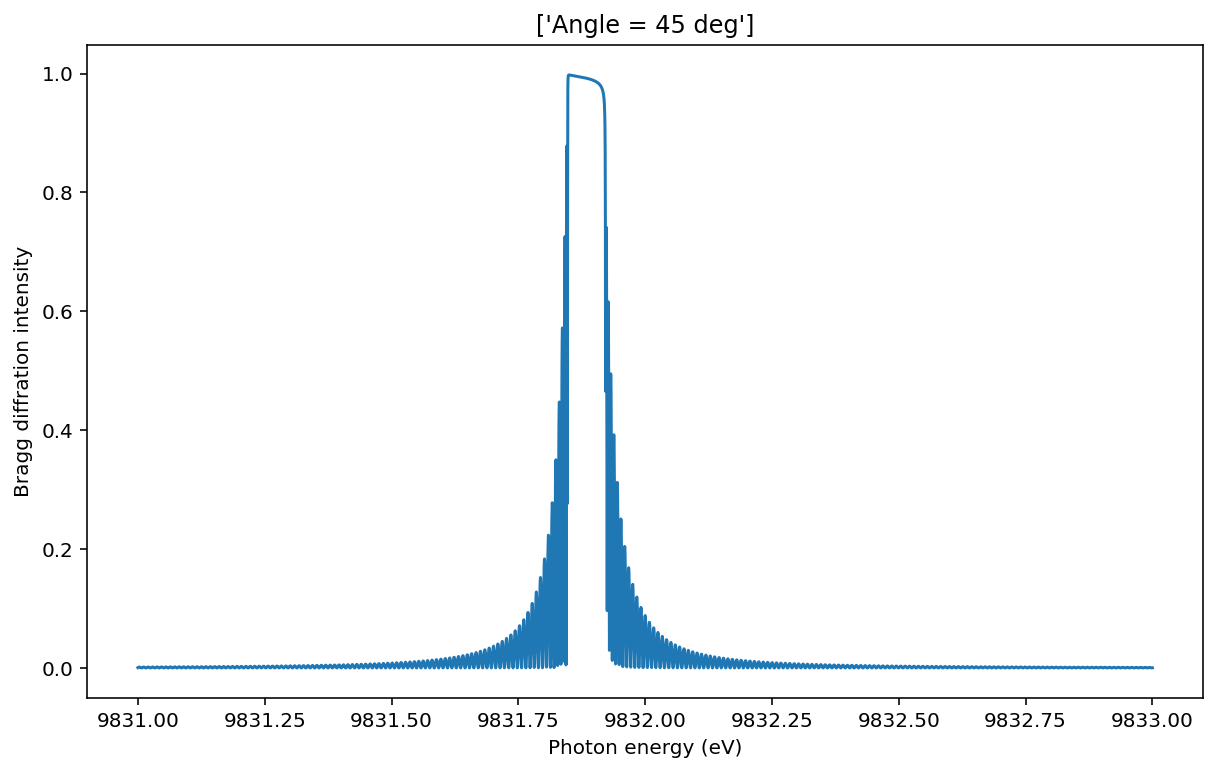

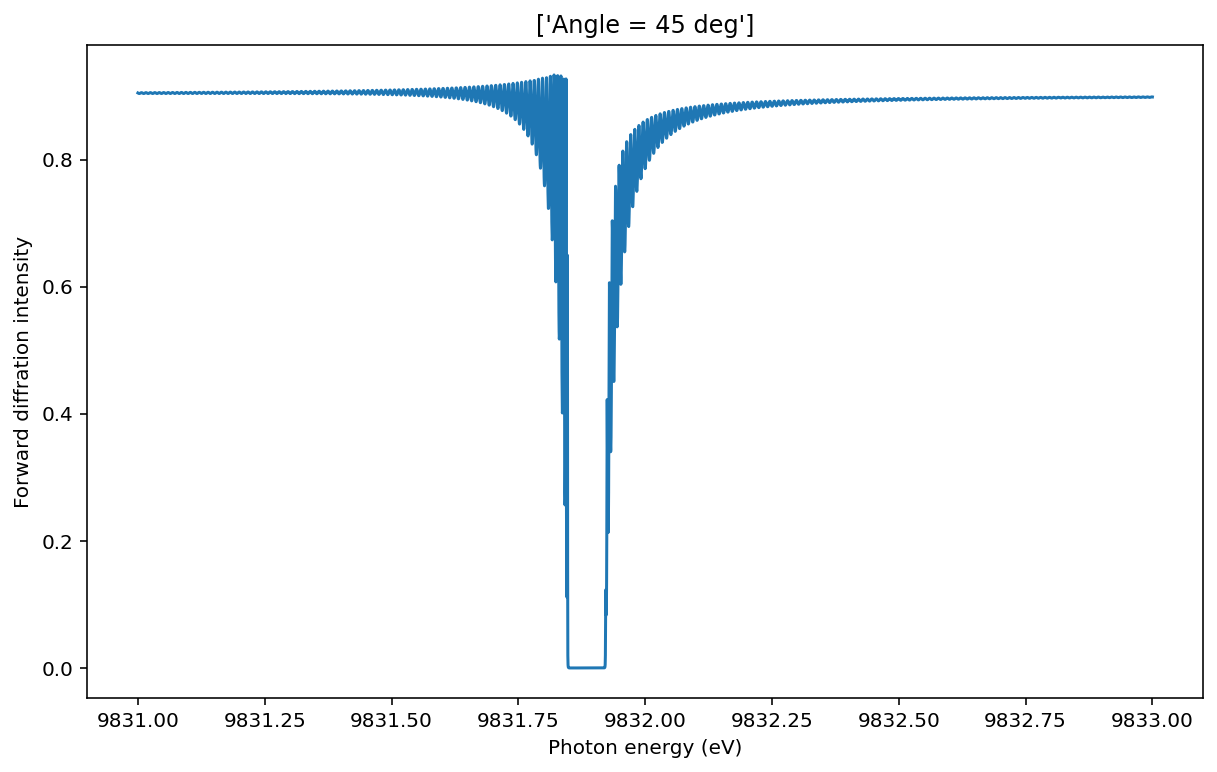

In [32]:
from cavity_codes.Bragg_mirror import *
Eph, R0H, R00 = plot_Bragg_mirror_response_slice(d = 100e-6)

In [39]:
data = pickle.load( open( "genesis_interface/S2E_spectrum.p", "rb" ) )
data2 = pickle.load( open( "genesis_interface/S2E_power.p", "rb" ) )

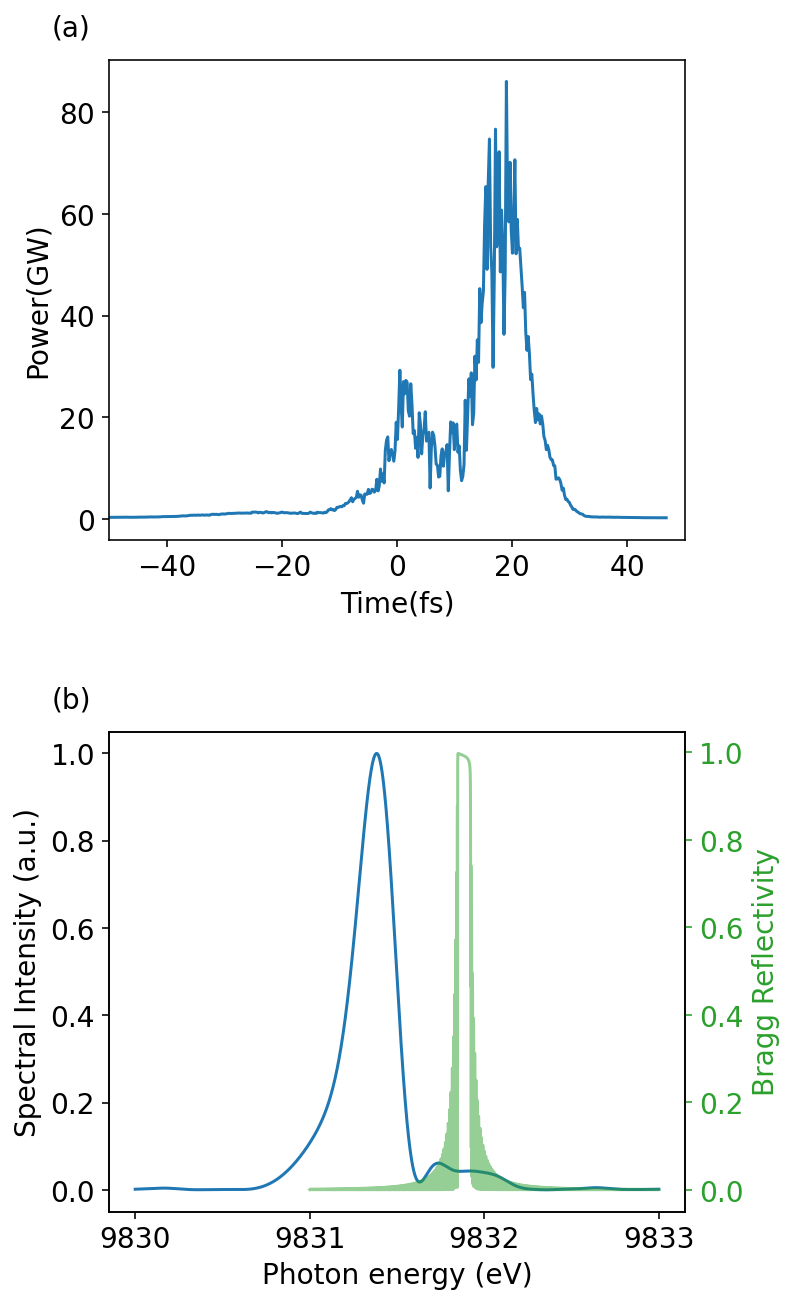

In [62]:
fig, ax = plt.subplots(2, 1,figsize=(5,10))
fontsize = 14
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)


sl = data[0]
pl = data[1]
tax = ax[1]
tax.plot(sl, pl/np.max(pl))
ax2 = tax.twinx()
ax2.plot(Eph, R0H, alpha = 0.5, color = 'C2')
tax.set_xlabel('Photon energy (eV)', fontsize = fontsize)
tax.set_ylabel('Spectral Intensity (a.u.)', fontsize = fontsize)
ax2.set_ylabel('Bragg Reflectivity', color= 'C2', fontsize = fontsize)
tax.tick_params(axis='y',labelsize = fontsize)
tax.tick_params(axis='x',labelsize = fontsize)
ax2.tick_params(axis='y',labelsize = fontsize, colors = 'C2')
tax.annotate('(b)',xy = (-0.1, 1.05), xycoords = 'axes fraction', fontsize = fontsize)



tax = ax[0]
sl = data2[0]
pl = data2[1]
tax.plot(sl - np.mean(sl) - 20, pl/1e9)
tax.set_xlabel('Time(fs)', fontsize = fontsize)
tax.set_xlim([-50, 50])
tax.set_ylabel('Power(GW)', fontsize = fontsize)
tax.tick_params(axis='y',labelsize = fontsize)
tax.tick_params(axis='x',labelsize = fontsize)
tax.annotate('(a)',xy = (-0.1, 1.05), xycoords = 'axes fraction', fontsize = fontsize)
plt.savefig('figures/S2E_power_spec.pdf', format='pdf', dpi = 100, bbox_inches = "tight")